<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Black; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Employee Attrition Analysis and Prediction </p></div>

<div align="center">
  <img src="https://blog.vantagecircle.com/content/images/size/w1000/2020/08/Employee-Attrition.png" alt="Image Description" width="500" height="400">
</div>

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div> 

In [20]:
# Libray for Data Manipulation.
import numpy as np
import pandas as pd

#Library for Data Visualization.
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set_context("poster",font_scale = .7)

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency


# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings("ignore")

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Loading Dataset </div> 

In [3]:
data = pd.read_csv("ml_final_project.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Data Wrangling </div> 

#### 1. Computing Dimension of Dataset

In [4]:
data.shape

(1470, 35)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **1470 records** and **35 columns** availabe in the dataset.

#### 2. Statistical Summary of Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Identify the data types of columns
column_data_types = data.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


#### 3. Random Sample of dataset with only Numerical Feature 

In [7]:
data.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
969,48,855,4,3,1,1363,4,54,3,3,4,7898,18706,1,11,3,3,80,0,11,2,3,10,9,0,8
665,47,1454,2,4,1,925,4,65,2,1,4,3294,13137,1,18,3,1,80,0,3,3,2,3,2,1,2
992,39,1485,25,2,1,1397,3,71,3,3,3,10920,3449,3,21,4,2,80,1,13,2,3,6,4,0,5
979,34,285,29,3,1,1377,2,86,3,2,3,5429,17491,4,13,3,1,80,2,10,1,3,8,7,7,7
47,37,408,19,2,1,61,2,73,3,1,2,3022,10227,4,21,4,1,80,0,8,1,3,1,0,0,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Some of the numerical features are storing discrete numbers (cateegories labelled) in numbers.
* So for better analysis we will replace those labelled numerical values with appropriate categorical values.

#### 4. Labelling of Categories in Numerical Features.

The values used below to label the categories is provided in the dataset description on kaggle.

In [8]:
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobInvolvement"] = data["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["PerformanceRating"] = data["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})
data["Education"] = data["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
data["JobLevel"] = data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",
                                           4:"Senior Level",5:"Executive Level"})

#### 5. Random Sample of dataset with only categorical Feature

In [9]:
data.select_dtypes(include='O').sample(5)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
190,No,Travel_Rarely,Research & Development,Master,Life Sciences,High,Male,Medium,Executive Level,Manager,High,Married,Y,No,Excellent,Low,Better
1344,No,Travel_Rarely,Research & Development,Master,Medical,Very High,Male,High,Junior Level,Research Scientist,Low,Married,Y,Yes,Outstanding,High,Better
866,No,Travel_Frequently,Sales,Master,Medical,Medium,Male,High,Junior Level,Sales Executive,Medium,Married,Y,No,Excellent,Very High,Better
159,No,Travel_Frequently,Sales,Master,Marketing,High,Female,High,Entry Level,Sales Representative,High,Married,Y,No,Excellent,Very High,Better
783,No,Travel_Rarely,Research & Development,College,Technical Degree,Medium,Female,Very High,Entry Level,Research Scientist,High,Married,Y,No,Excellent,High,Better


#### 6. Checking if There's Any Duplicate Records.

In [10]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There are no duplicate records present in the dataset.

#### 7. Computing Total No. of Missing Values and the Percentage of Missing Values.

In [11]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* None of the Attribute are having Missing Values.  

#### 8. Performing Descriptive Analysis

In [12]:
round(data.describe().T,2)     #rounding to 2 decimal place

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.10,7117.79,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.69,2.50,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.21,3.66,11.0,12.00,14.0,18.00,25.0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The Minimum Age is 18 which conveys that All employees are Adult. So there's no need of Over18 Attribute for our analysis.
* The Stanard Deviation value of EmployeeCount and StandardHours is 0.00. Which conveys that all values present in this attribute are same.
* Attribute EmployeeNumber represents a unique value to each of the employees, which will not provide any meaningful inisghts.
* Since this Attribute will not provide any meaningful insights in our analysis, we can simply drop these attributes.

#### 9. Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [13]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
data.drop(columns=cols, inplace=True)

#### 10 Performing Descriptive Analysis on Categorical Attributes.

In [14]:
data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Attrition and OverTime column is highly biased towards No category.  
* BusinessTravel Attribute is highly biased towards Travel_Rarely category.  
* Performance Rating is highly biased towards Excellent category. 

#### 11. Checking Unique Values of Categorical Attributes.

In [15]:
cat_cols = data.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(data[column]))
    print("-"*121)

Unique values of  Attrition {'Yes', 'No'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'Sales', 'Research & Development', 'Human Resources'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  Education {'College', 'Bachelor', 'Doctor', 'Below College', 'Master'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  EducationField {'Medical', 'Marketing', 'Human Resources', 'Technical Degree', 'Other', 'Life Sciences'}
----------------------------------------------------------------------------------------

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Exploratory Data Analysis (EDA) </div> 

#### 1. Visualizing the Employee Attrition Rate

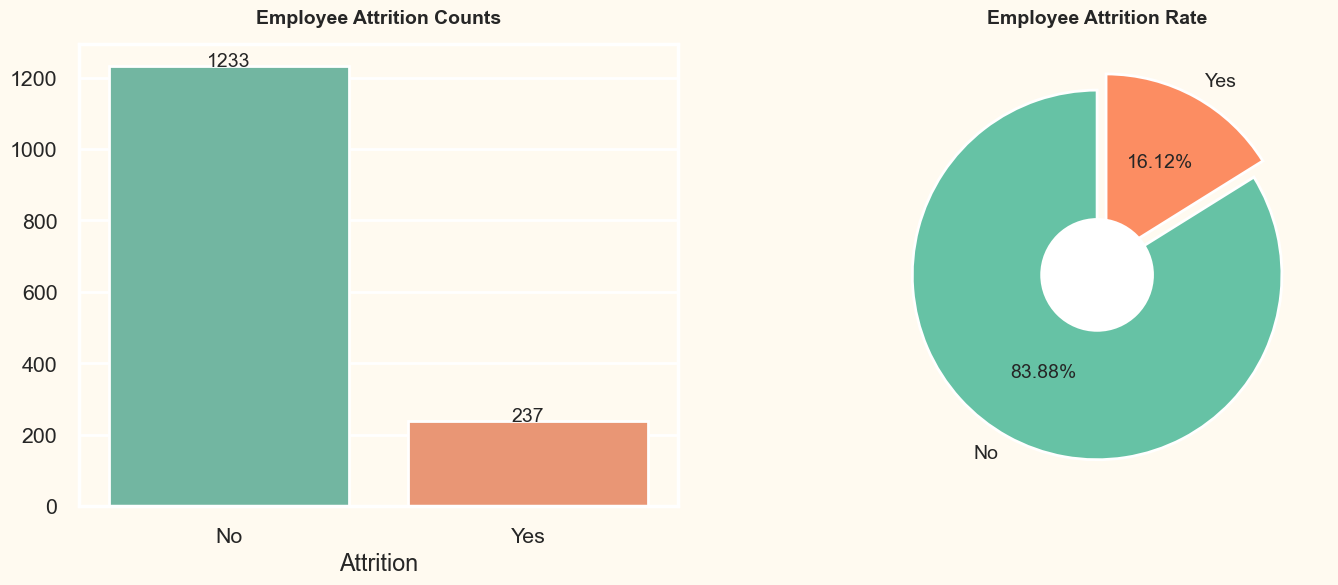

In [18]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

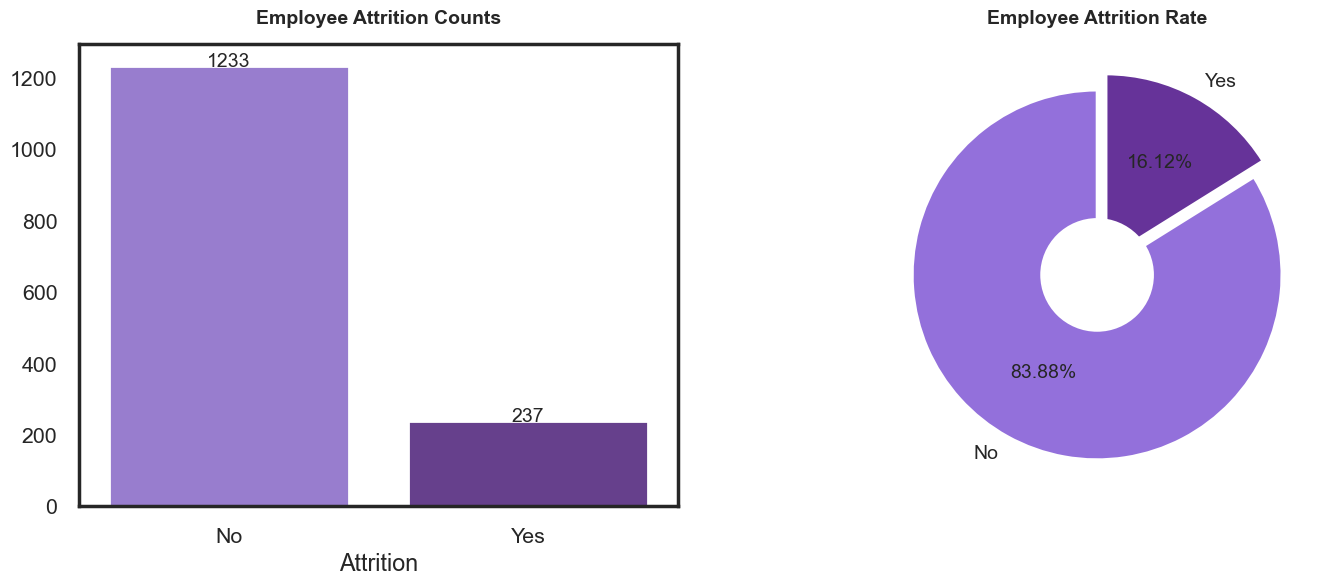

In [21]:
# Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
colors_counts = sns.color_palette(['#9370DB', '#663399'])  # Light and dark purple
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=colors_counts)
plt.title("Employee Attrition Counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha="center", fontsize=14)

# Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors_percentage = sns.color_palette(['#9370DB', '#663399'])  # Light and dark purple
plt.pie(attrition_rate, labels=["No", "Yes"], autopct="%.2f%%", textprops={"size":14},
        colors=colors_percentage, explode=[0, 0.1], startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate", fontweight="black", size=14, pad=15)
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The Employee Attrition rate of this organization is 16.12%. 
* The data is unbalanced. 

In [24]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()


In [29]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # Define variations of purple colors
    colors_purple = ['#9370DB', '#8A2BE2', '#800080', '#663399', '#4B0082']
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors_purple, textprops={"size": 14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette=colors_purple)
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()


#### 2. Analyzing Employee Attrition by Gender.

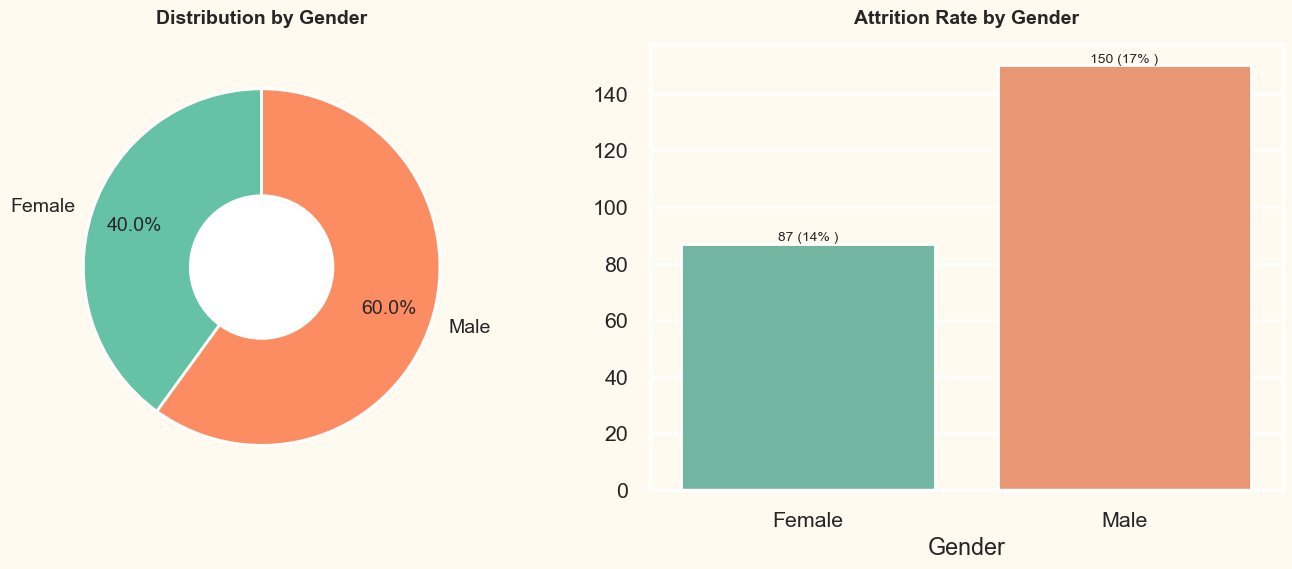

In [17]:
pie_bar_plot(data, 'Gender', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Male employees accounts for a higher proportion than female employees by more than 20%.  
* Attrition in male employees is higher compared to female employees.

#### 3. Analyzing Employee Attrition by Marital Status

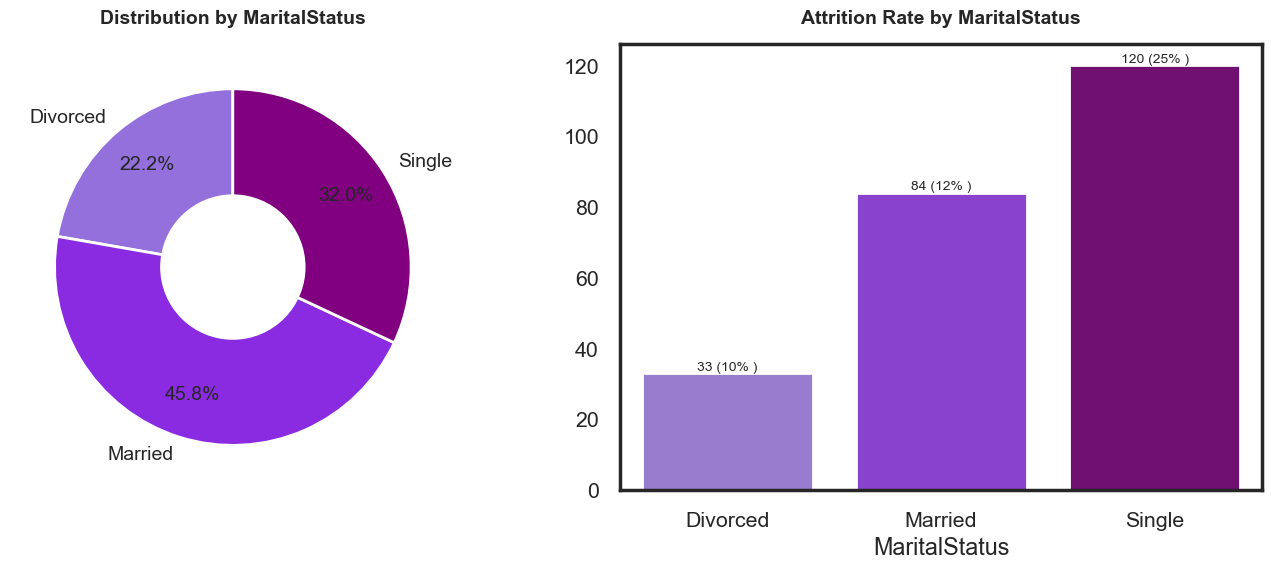

In [32]:
pie_bar_plot(data, 'MaritalStatus', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are Married in the organization.  
* The attrition rate is very high of employees who are divorced.  
* The attrition rate is low for employees who are single.

#### 4. Analyzing Employee Attrition by Business Travel.

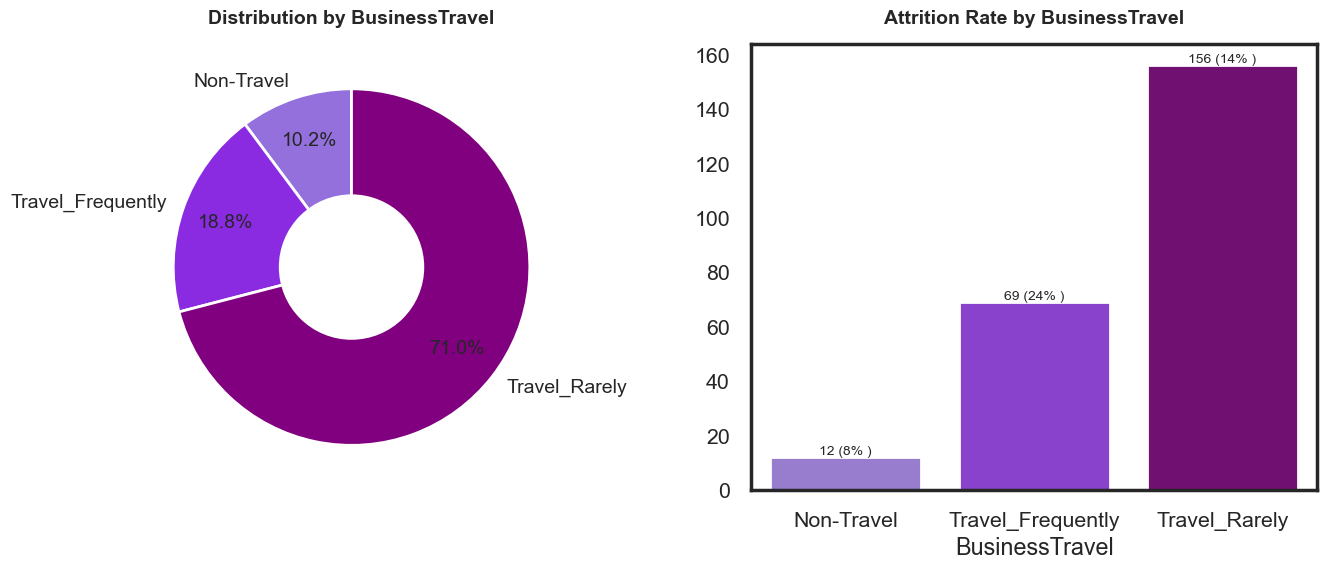

In [33]:
pie_bar_plot(data, 'BusinessTravel', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees in the organization Travel Rarely.
* Highest employee attrition can be observed by those employees who Travels Frequently.
* Lowest employee attrition can be observed by those employees who are Non-Travel.

#### 5. Analyzing Employee Attrition by Department.

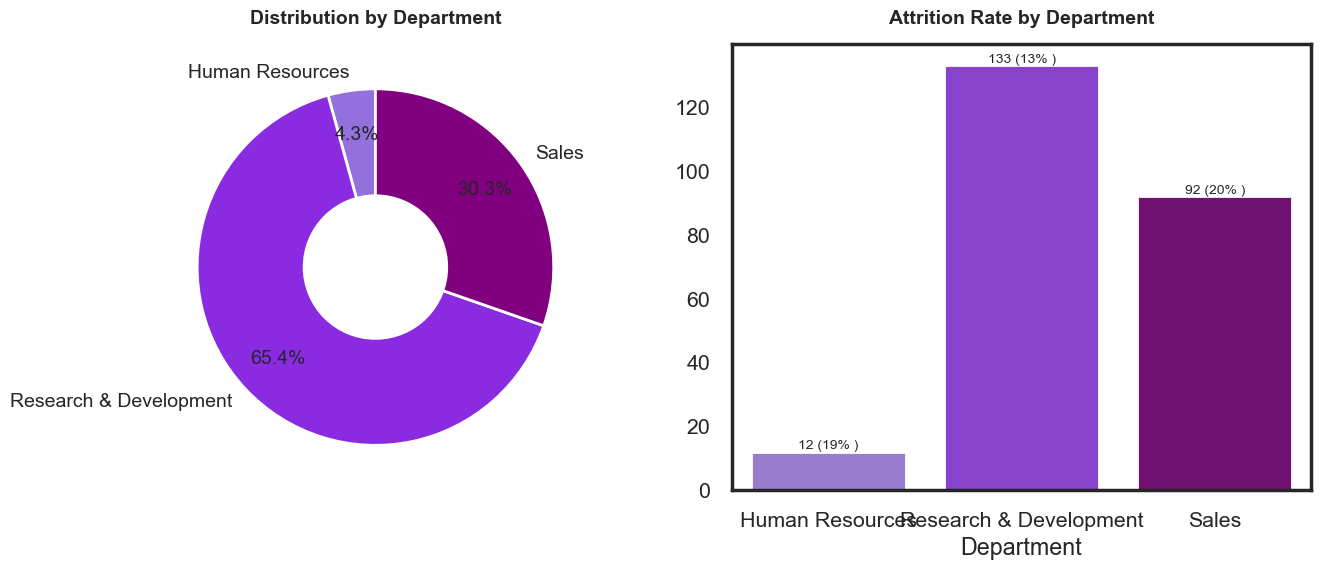

In [30]:
pie_bar_plot(data, 'Department', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are from Research & Development Department (65.4%).  
* Highest Attrition is in the Sales Department.  
* Human Resources Department Attrition rate is also very high.  
* Attrition in Research & Development Department is least compared to other departments.  

#### 6. Analyzing Employee Attrition by Education.

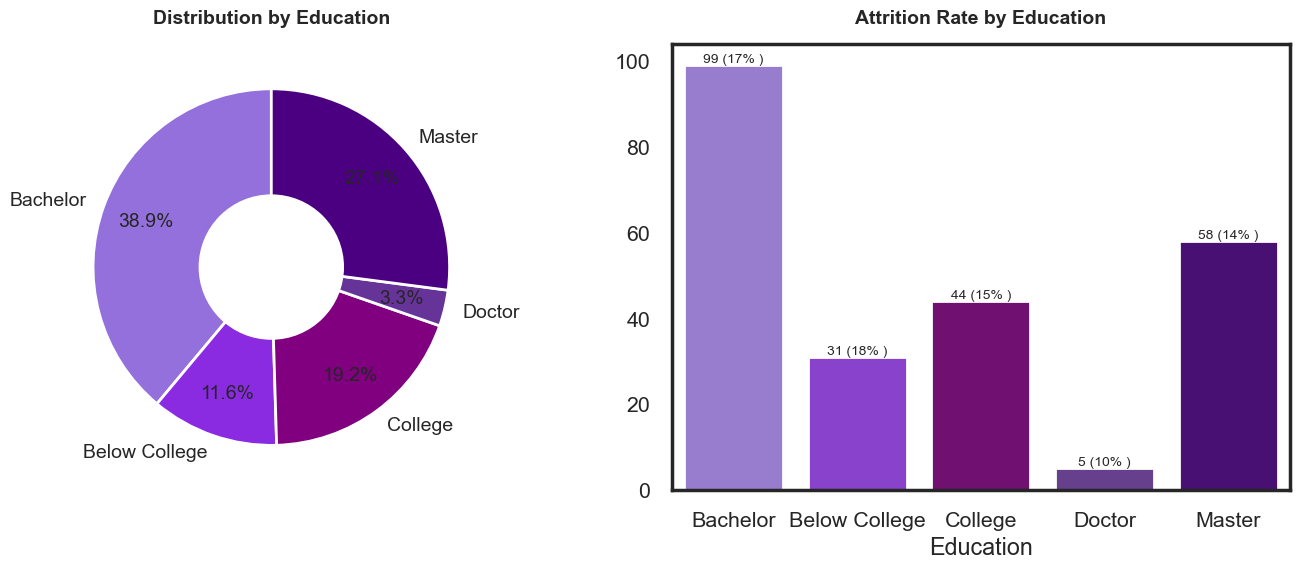

In [31]:
pie_bar_plot(data, 'Education', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees in the organization have completed Bachelors or Masters degree.    
* Very few employees in the organization have completed Doctorate degree.    
* Employee those who have not completed college (Below College level) has highest Attrition rate followed by Bachelor degree holder. 

In [22]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

In [34]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    # Define variations of purple colors
    colors_purple = ['#9370DB', '#8A2BE2', '#800080', '#663399', '#4B0082']
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette=colors_purple)
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette=colors_purple)
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()


#### 7. Employee Distribution by Age

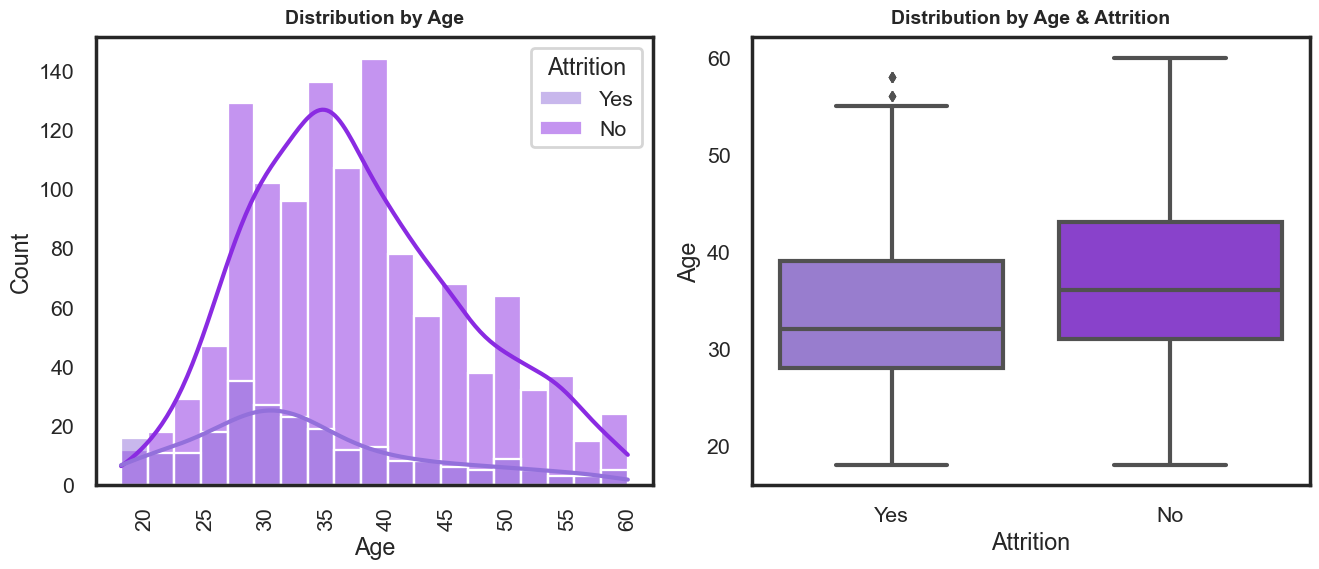

In [35]:
hist_with_hue(data, 'Age', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the emloyees are between age 30 to 40.      
* We can clearly observe a trend that as the age is increasing the attrition is decreasing.    
* The medain age of employee who left the organization is less than the employees who are working.    
* Employees with young age leaves the company more compared to elder employees. 

In [24]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [36]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    # Define variations of purple colors
    colors_purple = ['#9370DB', '#8A2BE2', '#800080', '#663399', '#4B0082']
    
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=colors_purple)
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette=colors_purple)
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


#### 8. Analyzing Employee Attrition by Education Field

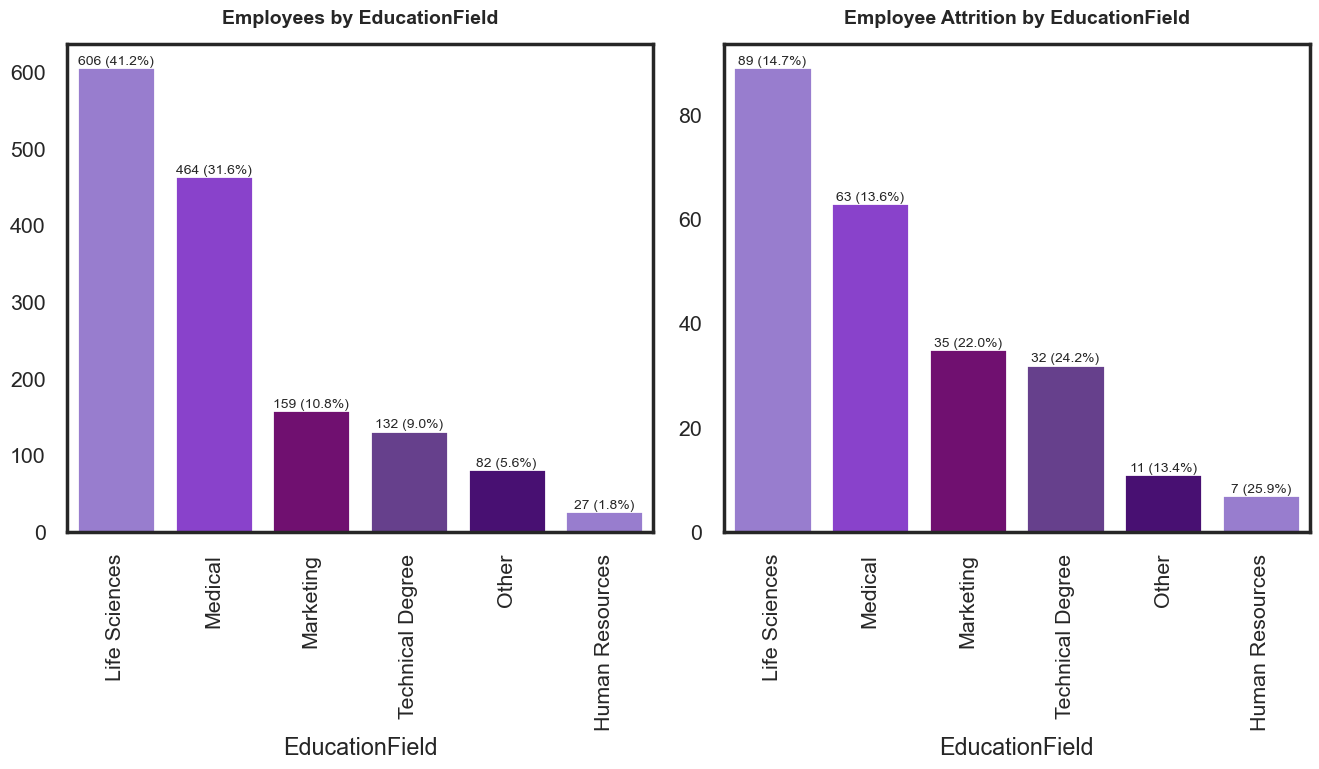

In [37]:
count_percent_plot(data, 'EducationField', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are either from Life Science or Medical Education Field.    
* Very few employees are from Human Resources Education Field.    
* Education Fields like Human Resources, Technical, Marketing is having very high attrition rate.      
* This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate. 

#### 9. Analyzing Employee Attrition by Environment Satisfaction.

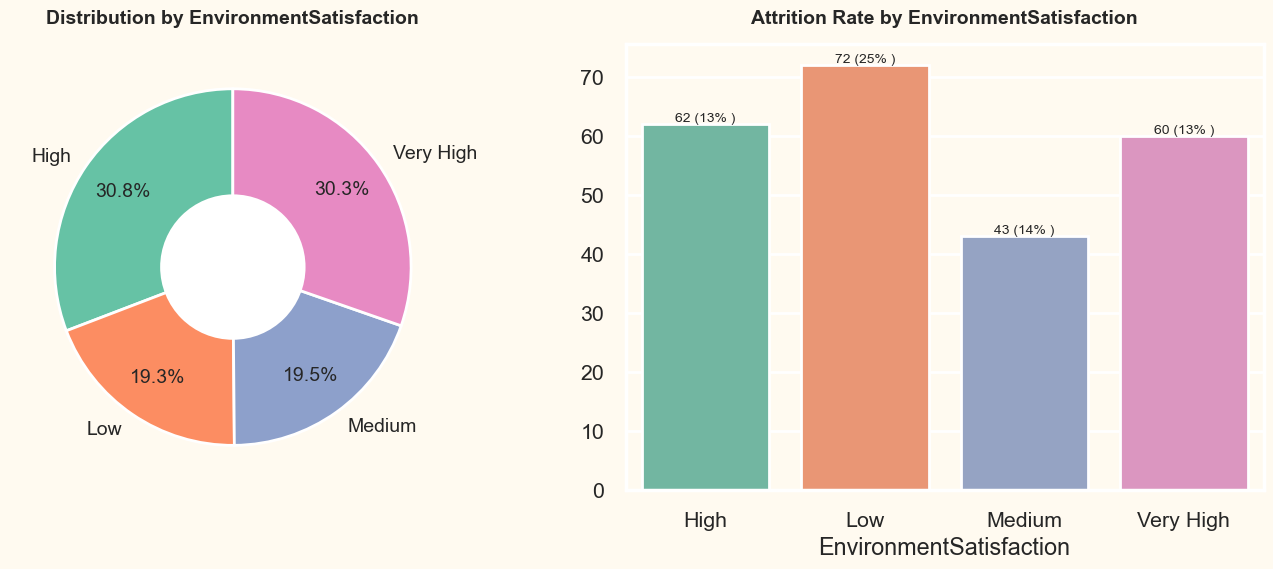

In [26]:
pie_bar_plot(data, 'EnvironmentSatisfaction', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees have rated the organization environment satisfaction High & Very High.    
* Attrition Rate is high among the employee with high level of environment satisfication.

#### 10. Analyzing Employee Attrition by Job Satisfaction.

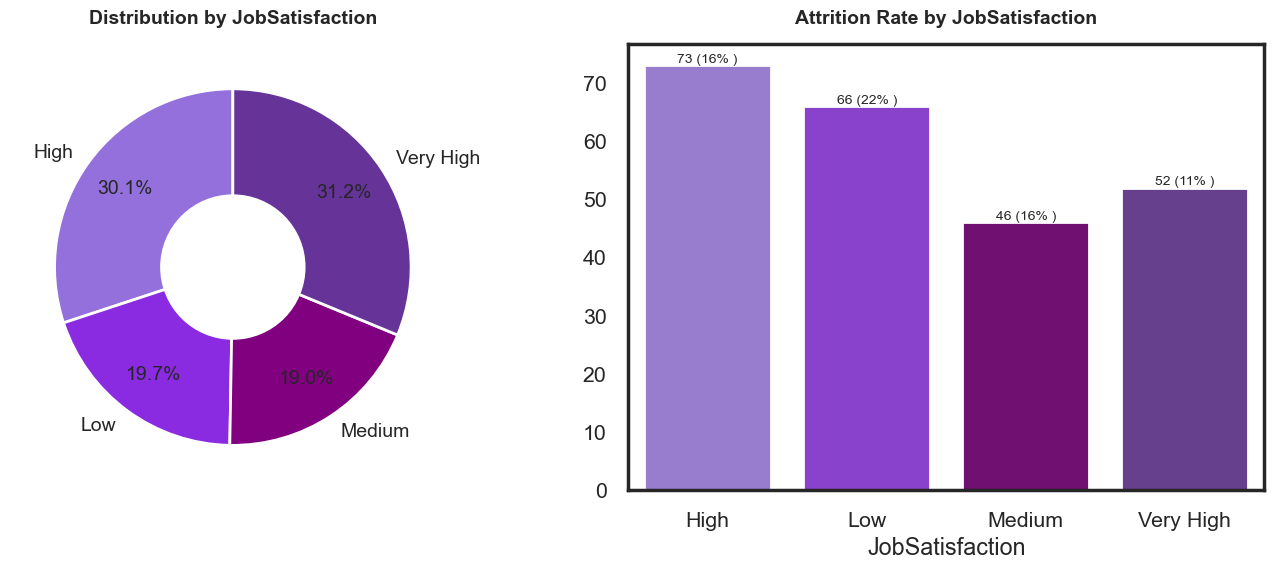

In [38]:
pie_bar_plot(data, 'JobSatisfaction', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees have rated their job satisfaction as high or very high.  
* Employees who rated their job satisfaction low are mostly leaving the organization. 

#### 11. Analyzing Employee Attrition by Relationship Satisfaction.

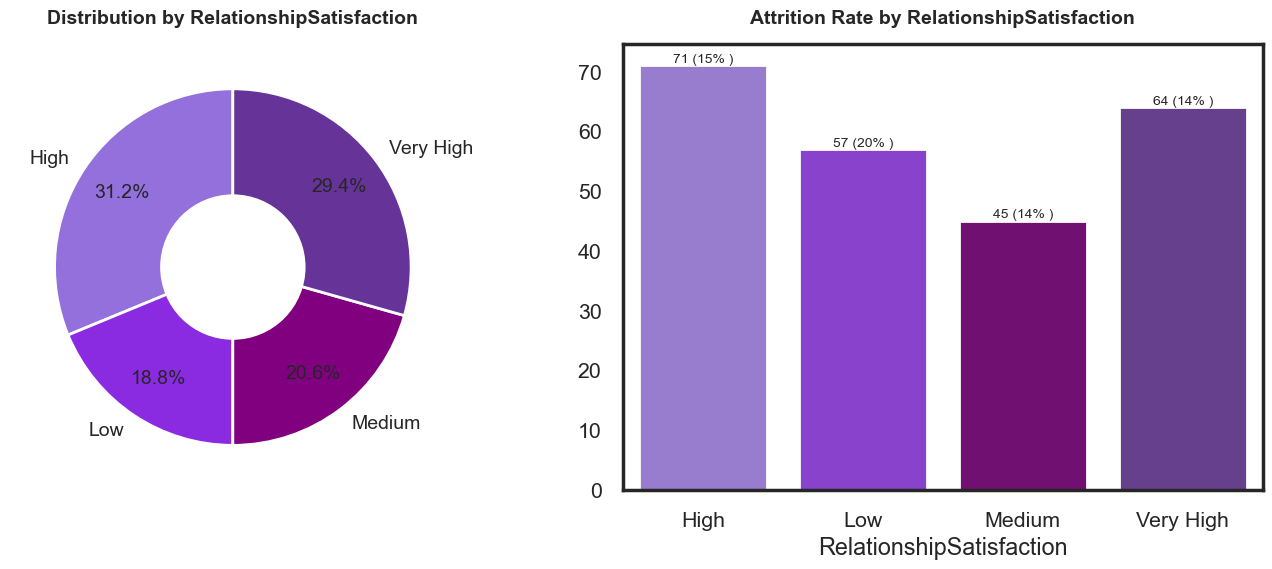

In [39]:
pie_bar_plot(data, 'RelationshipSatisfaction', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

*  Most of the employees are having high or very high relationship satisfaction.  
* Employe with 'low' relationship satification are most likely to leave the organisation.

#### 12. Analyzing Employee Attrition by Work Life Balance.

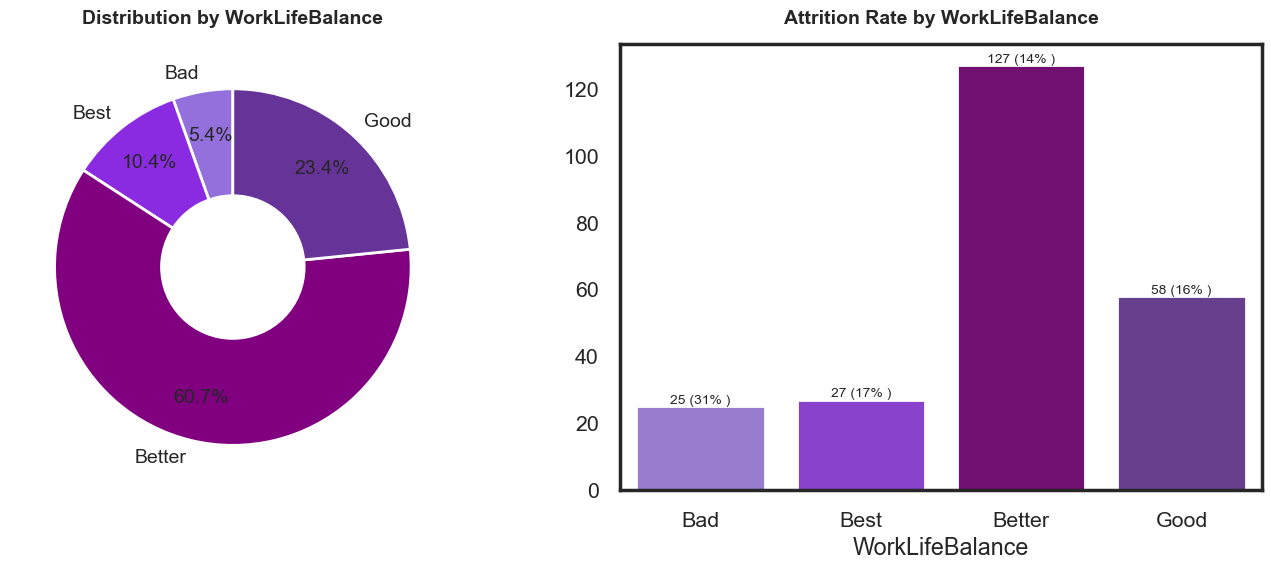

In [40]:
pie_bar_plot(data, 'WorkLifeBalance', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* More than 60% of employees are having a better work life balance.  
* Employees with Bad Work Life Balance is having very high Attrition Rate.  

#### 13. Analyzing Employee Attrition by Performance Rating.

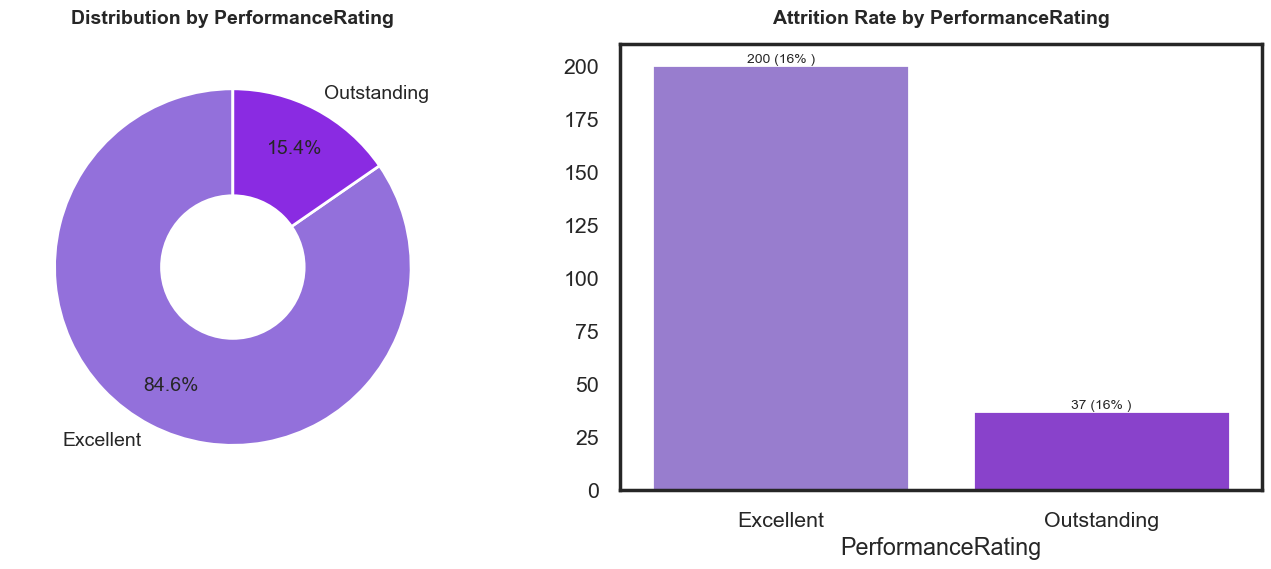

In [41]:
pie_bar_plot(data, 'PerformanceRating', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are having excellent performance rating.  
* Both the categories in this field is having same attriton rate.  
* No meaningful insight from this feature.  

#### 14. Analyzing Employee Attrition by Over Time.

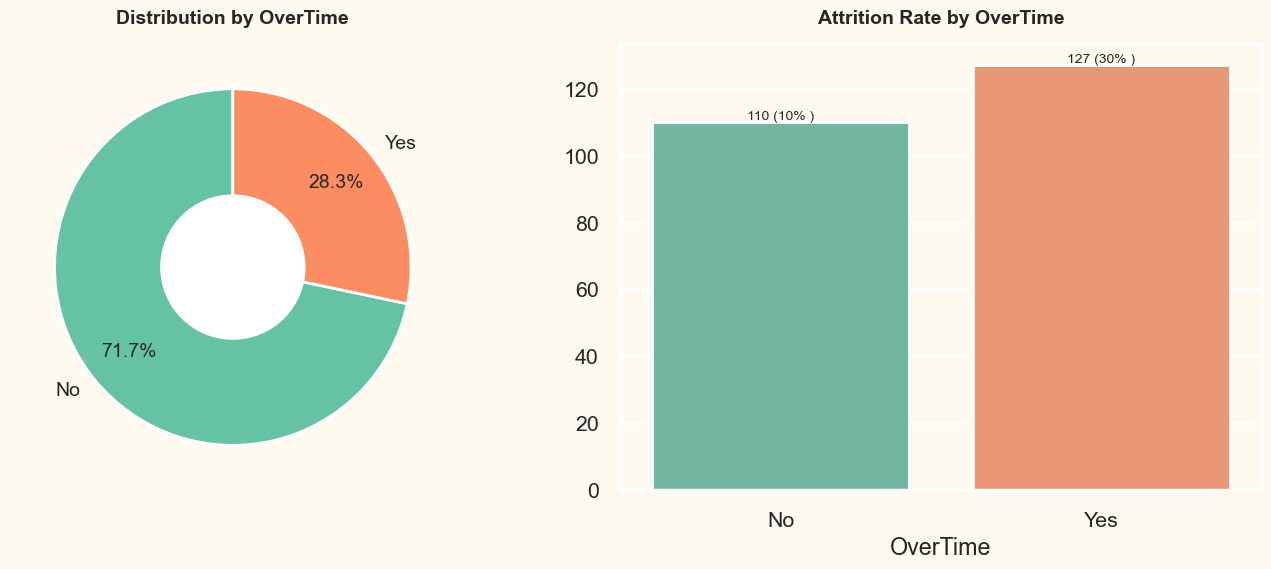

In [31]:
pie_bar_plot(data, 'OverTime', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees don't OverTime.  
* There is high attrition among those who overtime i.e work for more hours than regular working hours. 

#### 15. Analyzing Employee Attrition by Daily Rate.

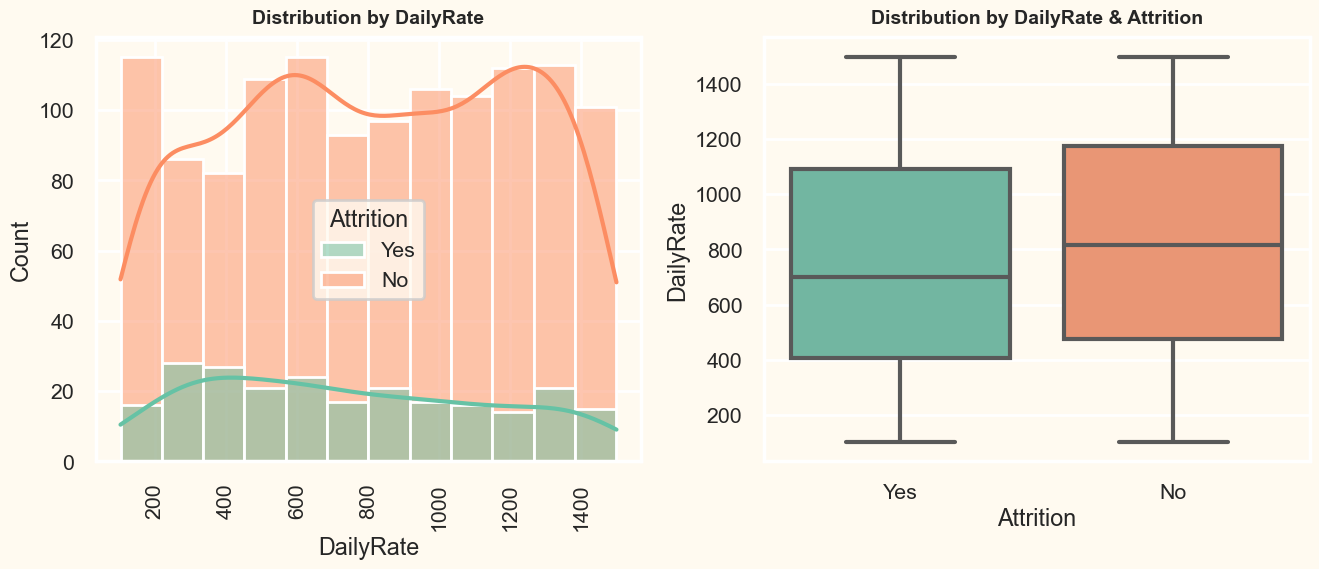

In [32]:
hist_with_hue(data, 'DailyRate', 'Attrition')

 <div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The medain dailyrate of employee who left the organization is less than the employees who are working.

#### 16. Analyzing Employee Attrition by Job Roles 

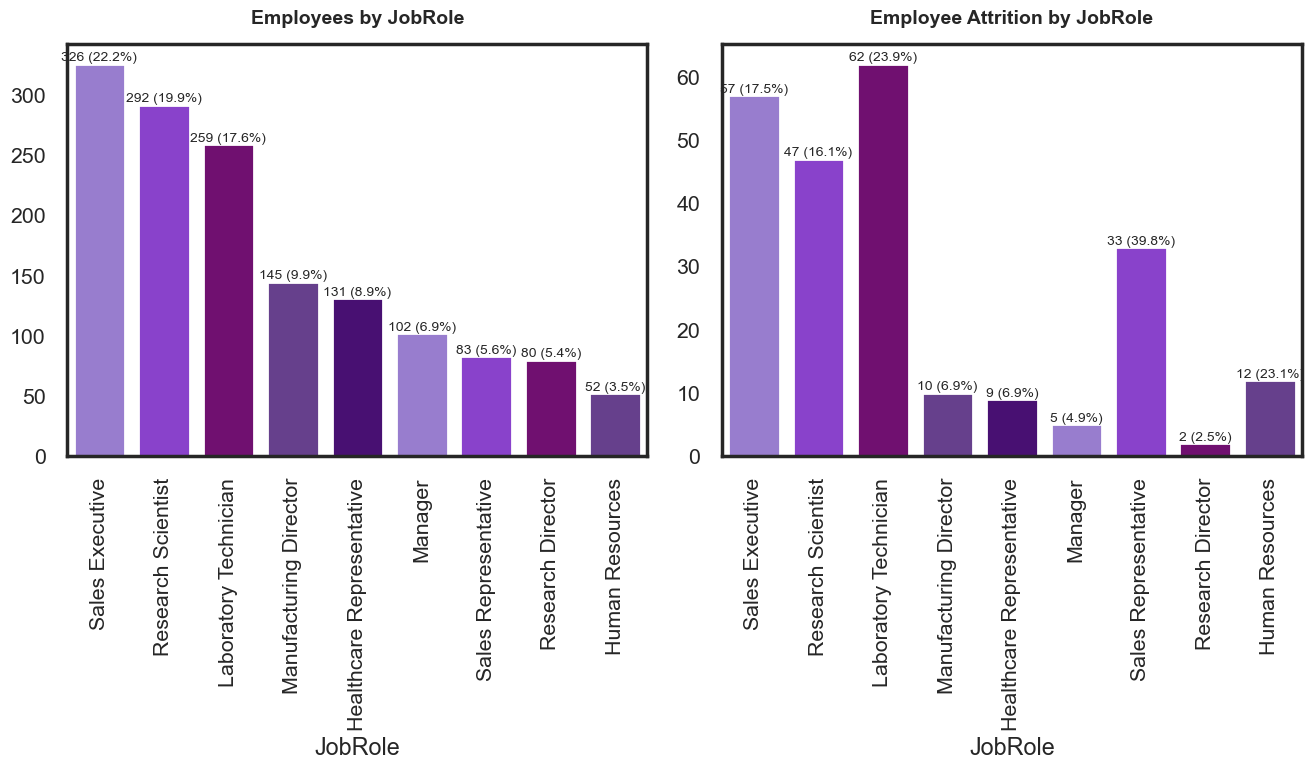

In [42]:
count_percent_plot(data, 'JobRole', 'Attrition')

Inference:    


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most employees is working as Sales executive, Research Scientist or Laboratory Technician.  
* Highest attrition rates are in role of Sale Representative.  

#### 17. Analyzing Employee Attrition by Job Level.

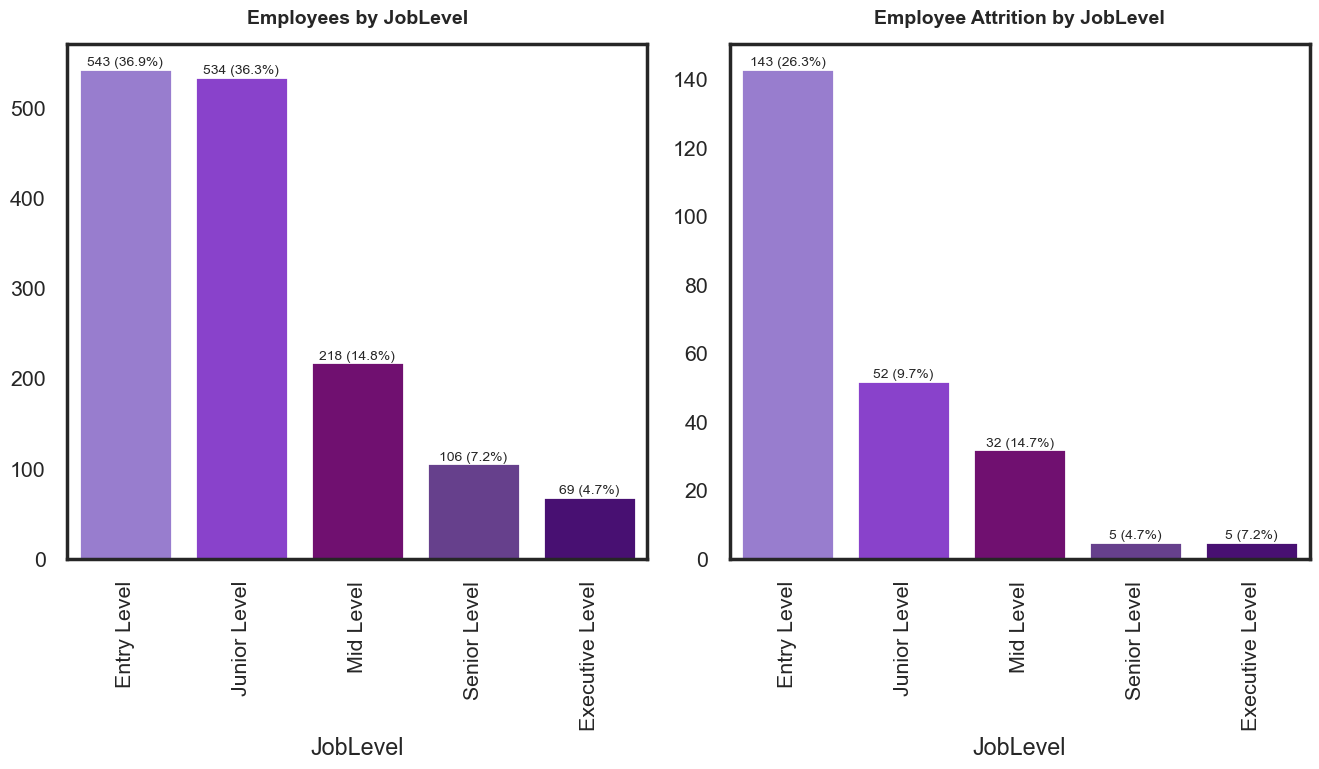

In [46]:
count_percent_plot(data, 'JobLevel', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees in the organization are at Entry Level or Junior Level.  
* Highest Attrition is at the Entry Level.

#### 18. Analyzing Employee Attrition by Monthly Income.

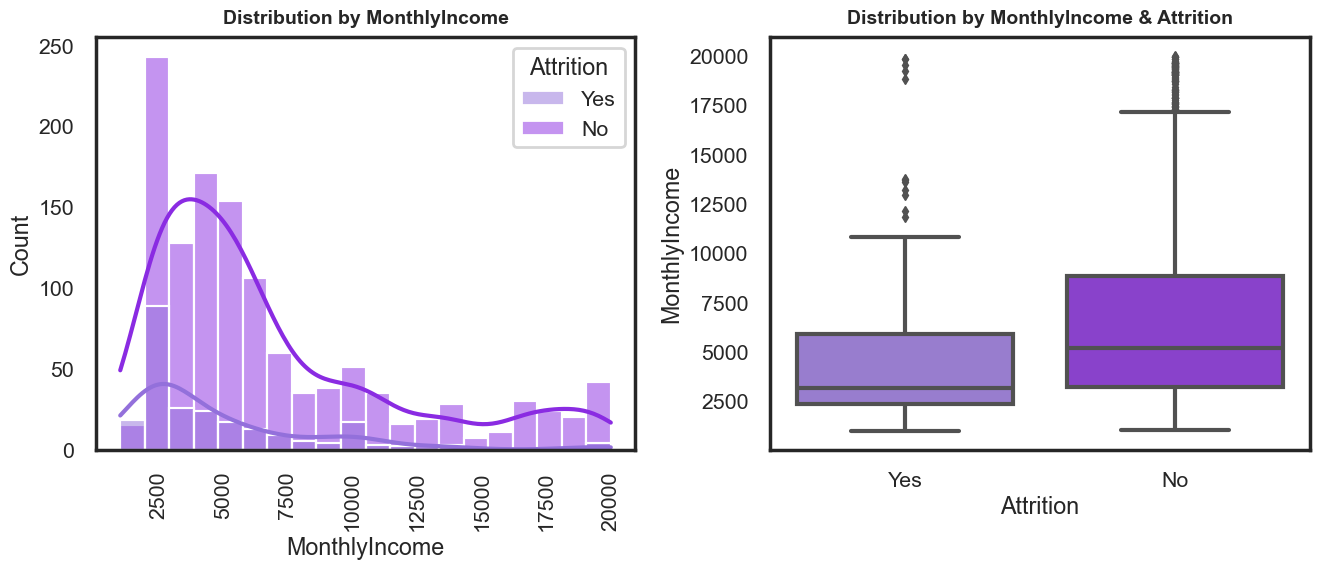

In [45]:
hist_with_hue(data, 'MonthlyIncome', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are getting paid less than 10000 in the organiation.  
* The median monthly income of employee who have left is comparatively low with employee who are still working.  
* As the Monthly Income increases the attrition decreases.  

#### 19. Analyzing Employee Attrition by Monthly Rate.

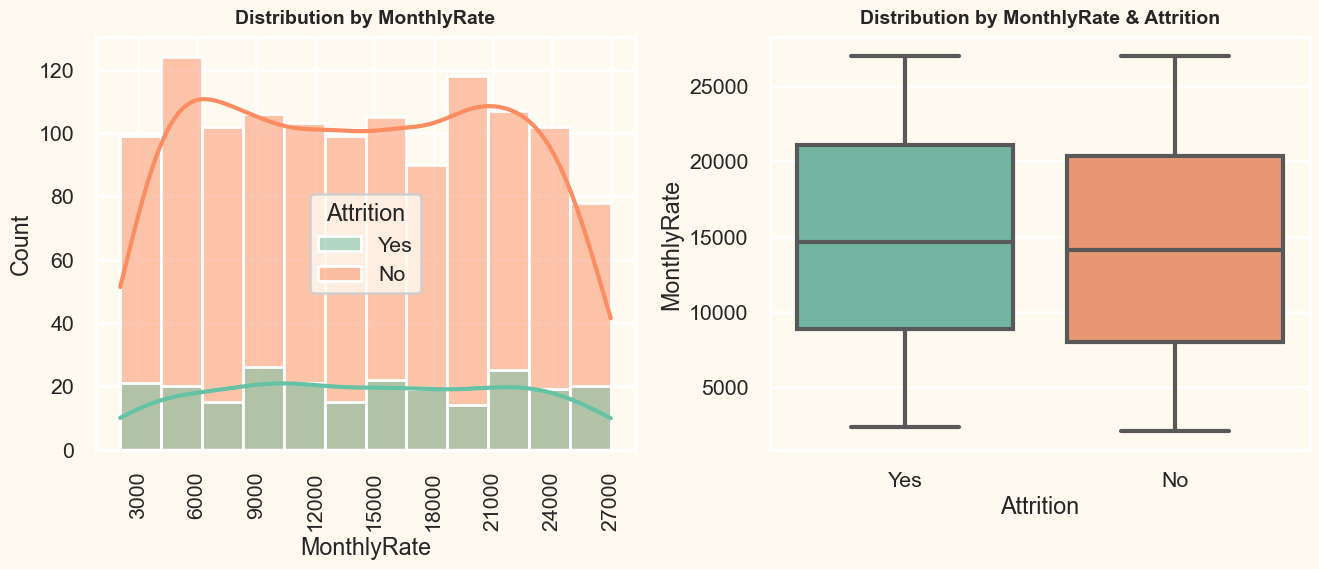

In [36]:
hist_with_hue(data, 'MonthlyRate', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The distribution of MonthlyRate is similar througout the column.  
* So this feature doesn't provide any meaningful insights in the employee attrition.

#### 20. Analyzing Employee Attrition by Distance From Home

In [37]:
print("Total Unique Values in 'DistanceFromHome' Attribute is =>",data["DistanceFromHome"].nunique())

Total Unique Values in 'DistanceFromHome' Attribute is => 29


In [38]:
data["DistanceFromHome"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [39]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
data['DistanceGroup'] = pd.cut(data['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

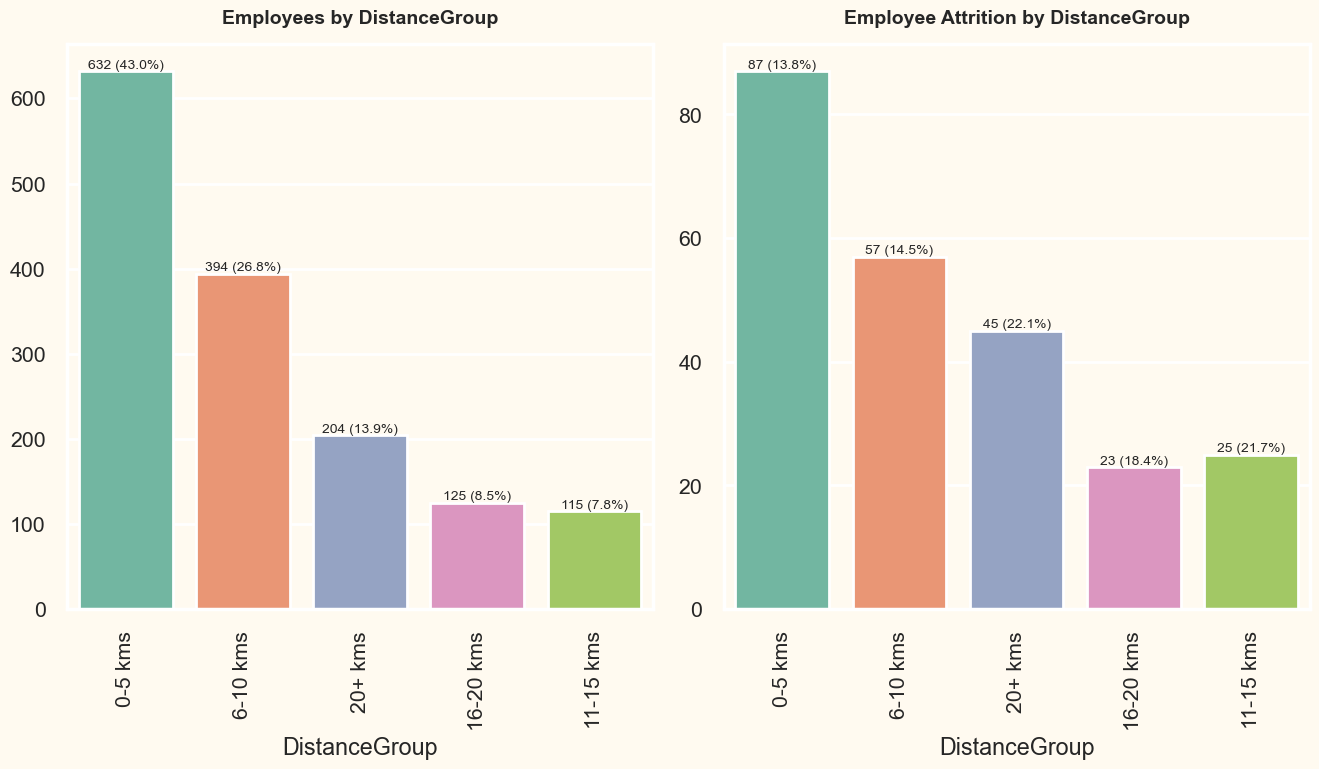

In [40]:
count_percent_plot(data, 'DistanceGroup', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are living within 10kms radius from the organisation.  
* As the distance from the organisation increases, Attrition Rate also increases.

#### 21 Analyzing Employee Attrition by Number of Companies Worked.

In [41]:
print("Total Unique Values in 'NumCompaniesWorked' Attribute is =>",data["NumCompaniesWorked"].nunique())

Total Unique Values in 'NumCompaniesWorked' Attribute is => 10


In [42]:
data["NumCompaniesWorked"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [43]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
data["NumCompaniesWorkedGroup"] = pd.cut(data['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

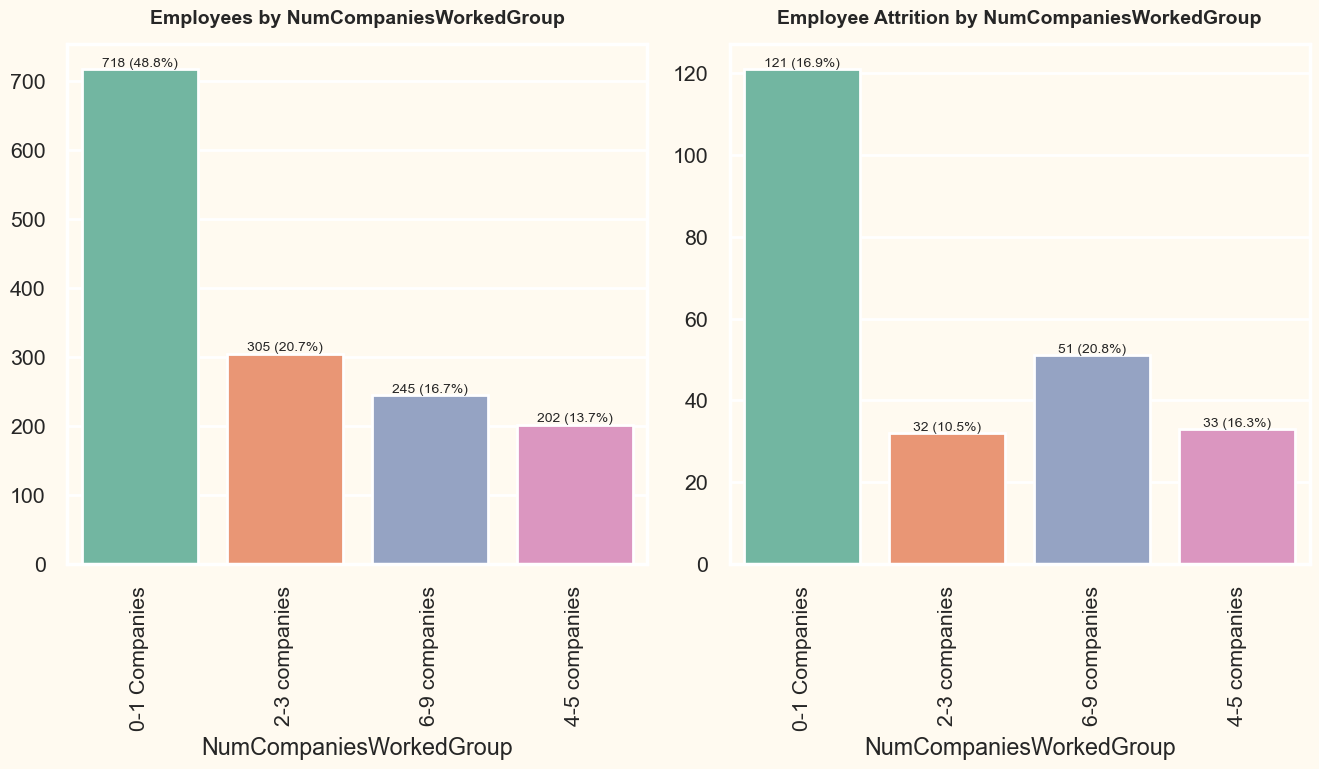

In [44]:
count_percent_plot(data, 'NumCompaniesWorkedGroup', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees have worked for less than 2 companies.  
* There's a high attrition rate of employees who haved worked for more than 5 companies followed by the employee who have worked for less than two companies

#### 22. Analyzing Employee Attrition by Percentage Salary Hike.

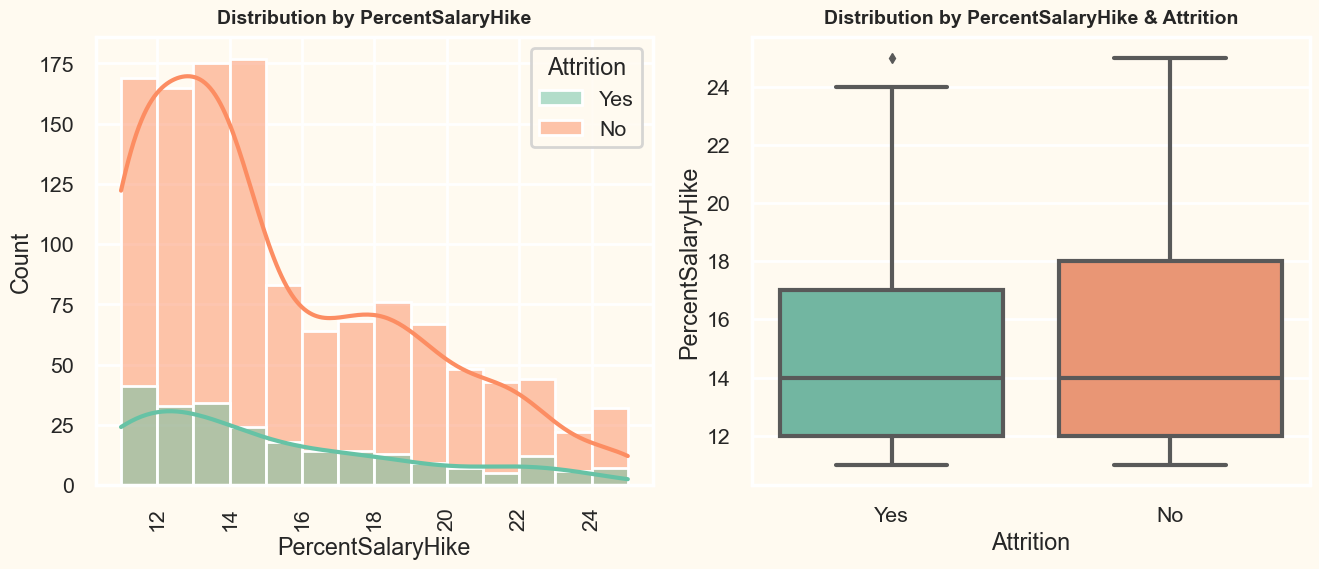

In [45]:
hist_with_hue(data, 'PercentSalaryHike', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Very Few employees are getting a high percent salary hike.  
* As the amount of percent salary increases the attrition rate decreases. 

#### 23. Analyzing Employee Attrition by Total Working Years.

In [46]:
print("Total Unique Values in 'TotalWorkingYears' Attribute is =>",data["TotalWorkingYears"].nunique())

Total Unique Values in 'TotalWorkingYears' Attribute is => 40


In [47]:
data["TotalWorkingYears"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0


In [48]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
data["TotalWorkingYearsGroup"] = pd.cut(data['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

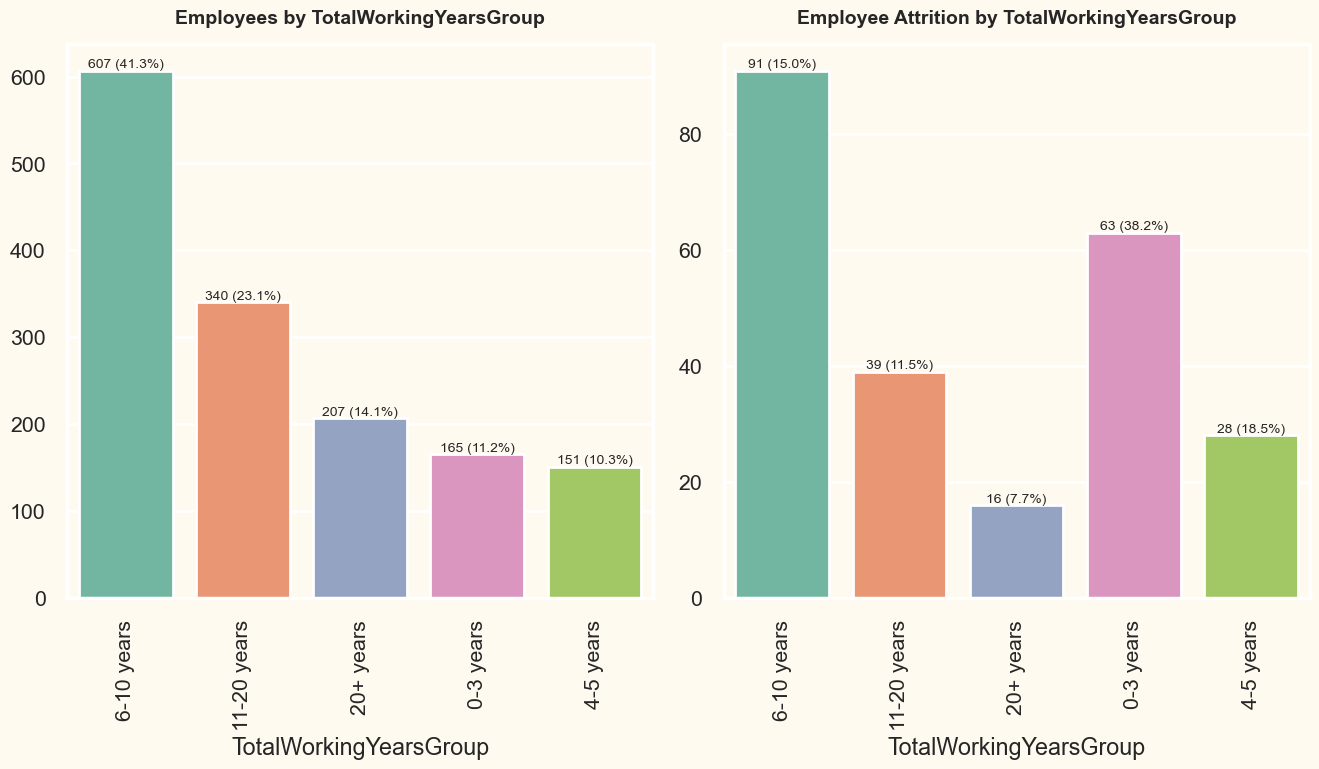

In [49]:
count_percent_plot(data, 'TotalWorkingYearsGroup', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are having a total of 6 to 10 years of working experience.  
* Employee with working experience upto 3 years are having High Attrition Rate.
* Employee with working experience of above 10 years are having Less Attrition Rate.

#### 24. Analyzing Employee Attrition by Years at Company.

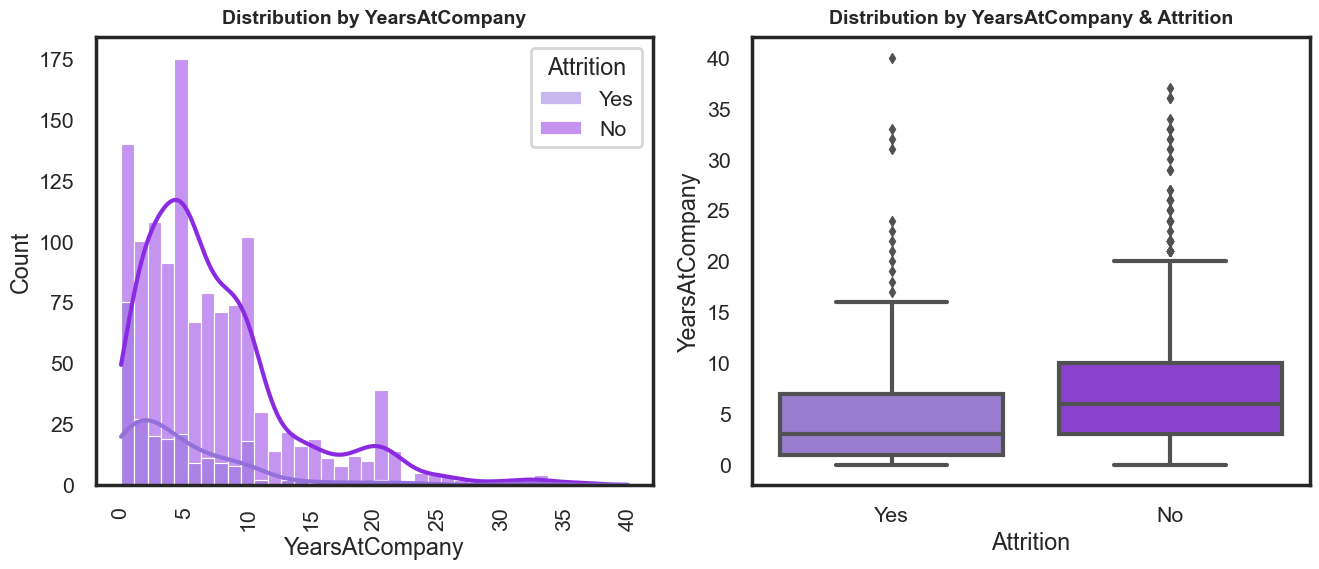

In [44]:
hist_with_hue(data, 'YearsAtCompany', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Employee who have worked for 10+ years are having low attrition rate.
* Highest Attrition is in the first year of employee joining organisation.

#### 25. Analyzing Employee Attrition by Years In Current Role

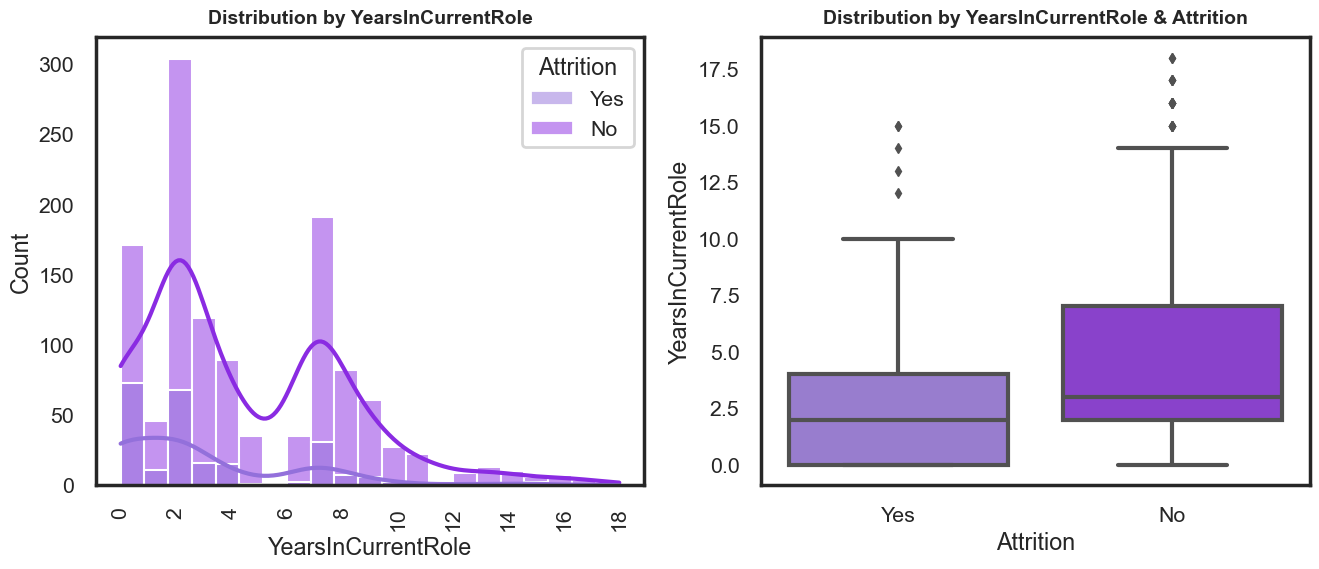

In [43]:
hist_with_hue(data, 'YearsInCurrentRole', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Employee who have worked for 8+ years in Current Role are less likely to leave organisation.
* Highest Attrition is in the first two year of the Current Role.

#### 26. Analyzing Employee Attrition by Years Since Last Promotion

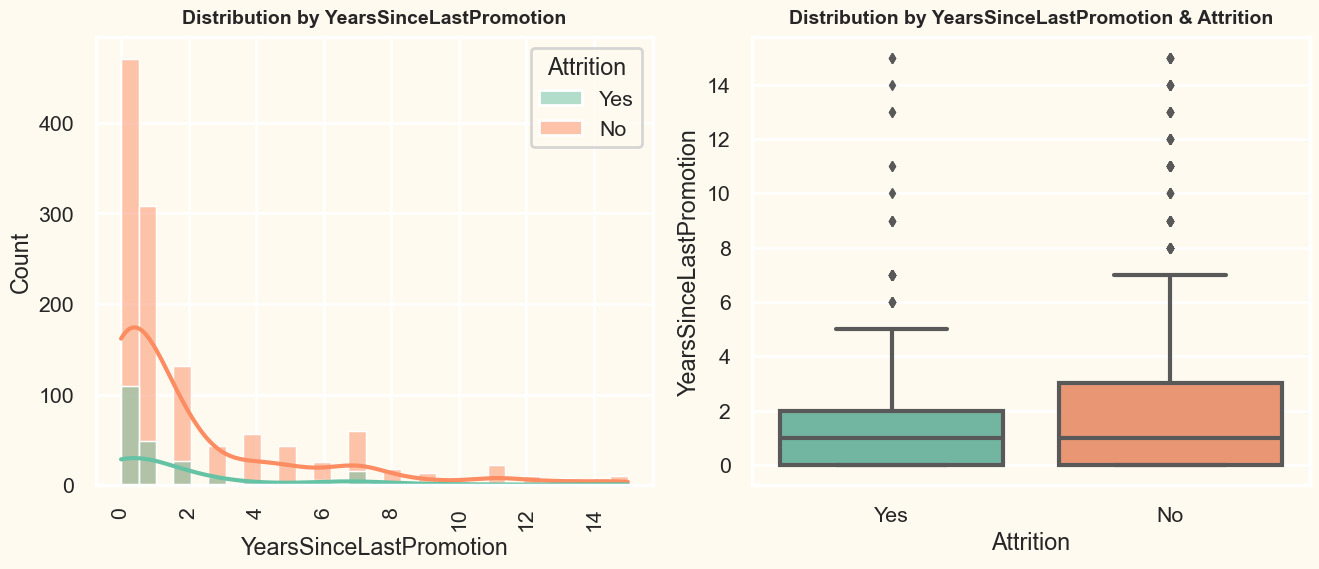

In [52]:
hist_with_hue(data, 'YearsSinceLastPromotion', 'Attrition')

#### 27. Analyzing Employee Attrition by Years with Current Manager.

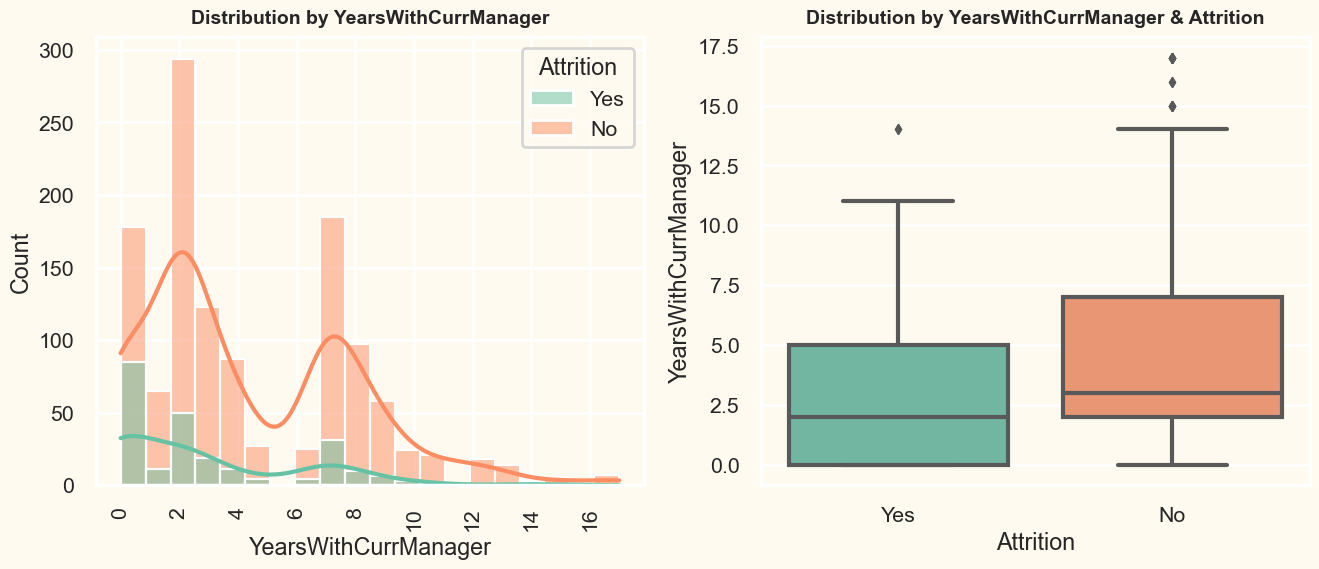

In [53]:
hist_with_hue(data, 'YearsWithCurrManager', 'Attrition')

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Statistical Analysis - Feature Importance </div> 

### 1. Performing ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

In [54]:
num_cols = data.select_dtypes(np.number).columns

In [55]:
new_data = data.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

In [56]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

#### Visualizing the F_Score of ANOVA Test of Each Numerical features.

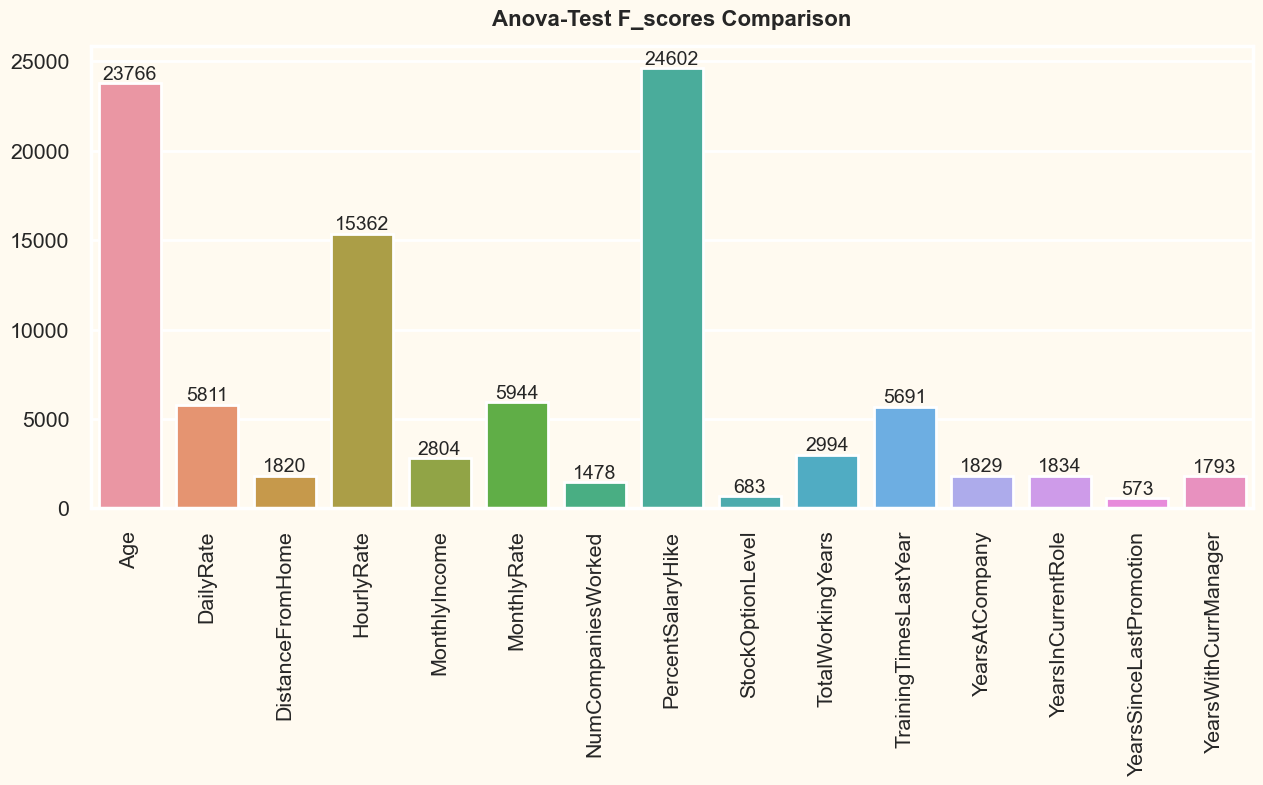

In [57]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

#### Comparing F_Score and P_value of ANOVA Test.

In [58]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

,Features,F_Score,P_value
0,Age,23766.934042,0.00000000000000000000
1,DailyRate,5811.796569,0.00000000000000000000
2,DistanceFromHome,1820.614585,0.00000000000000000000
3,HourlyRate,15362.122371,0.00000000000000000000
4,MonthlyIncome,2804.459632,0.00000000000000000000
5,MonthlyRate,5944.089071,0.00000000000000000000
6,NumCompaniesWorked,1478.188633,0.00000000000000000000
7,PercentSalaryHike,24602.507947,0.00000000000000000000
8,StockOptionLevel,683.069576,0.00000000000000000000
9,TotalWorkingYears,2994.906310,0.00000000000000000000


### 2. Performing Chi-Square Test to Analyze the Categorical Feature Importance in Employee Attrition.

In [59]:
cat_cols = data.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [60]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(data[col], data['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

#### Visualizing the Chi-Square Statistic Values of Each Categorical Features.

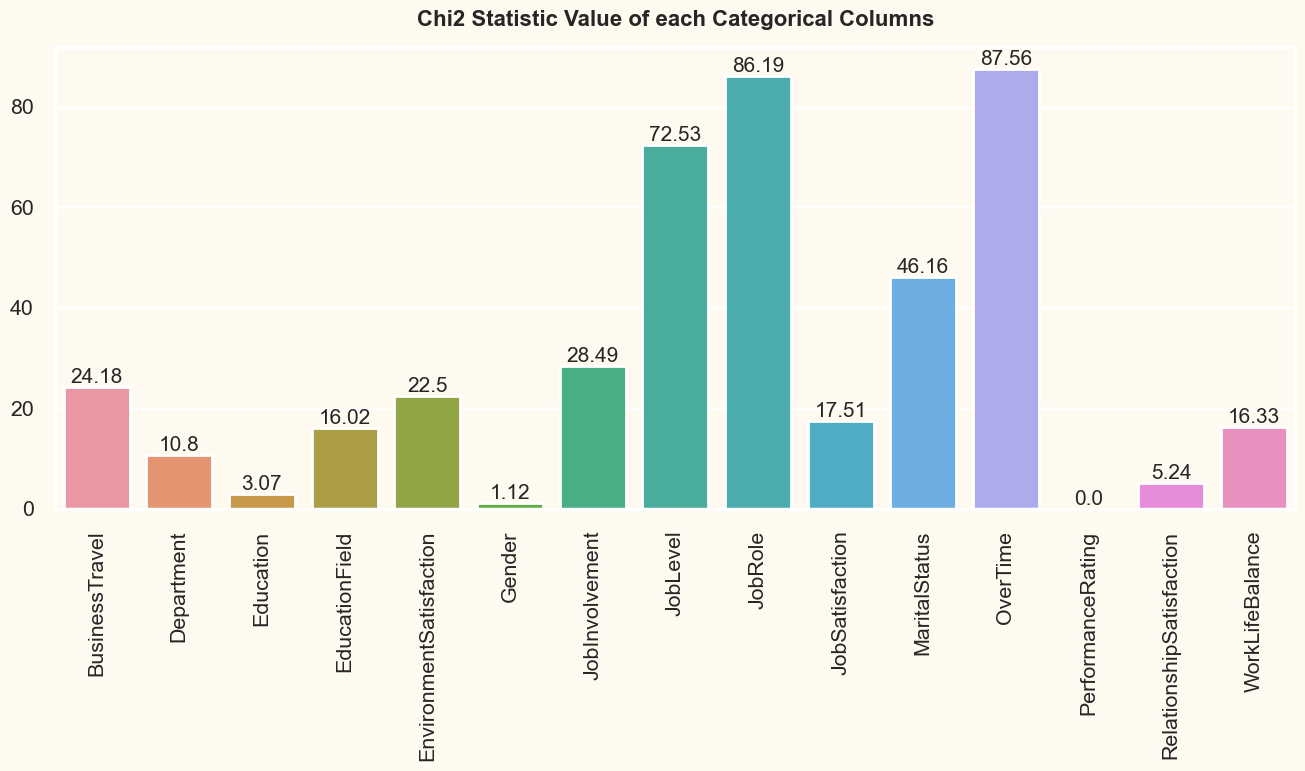

In [61]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

### Compairing Chi2_Statistic and P_value of Chi_Square Test.

In [62]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,Education,3.073961,0.54552533765659494414
3,EducationField,16.024674,0.00677398013902521211
4,EnvironmentSatisfaction,22.503881,0.00005123468906289433
5,Gender,1.116967,0.29057244902890855265
6,JobInvolvement,28.492021,0.00000286318063671342
7,JobLevel,72.529013,0.00000000000000663468
8,JobRole,86.190254,0.00000000000000275248
9,JobSatisfaction,17.505077,0.00055630045103875563


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Encoding </div> 

In [63]:
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].replace({"Low":0 ,"Medium":1, "High":2, "Very High":3})
data["JobInvolvement"] = data["JobInvolvement"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["PerformanceRating"] = data["PerformanceRating"].replace({"Low":0,"Good":1,"Excellent":2,"Outstanding":3})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({"Bad":0,"Good":1,"Better":2,"Best":3})
data["Education"] = data["Education"].replace({"Below College":0,"College":1,"Bachelor":2,"Master":3,"Doctor":4})
data["JobLevel"] = data["JobLevel"].replace({"Entry Level":0,"Junior Level":1,"Mid Level":2,
                                           "Senior Level":3,"Executive Level":4})
data["Gender"] = data["Gender"].replace({"Female":0 ,"Male":1})
data["Attrition"] = data["Attrition"].replace({"No":0 ,"Yes":1})

In [64]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

#### Label Encoding for remaining Categorical Columns

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   int64   
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   int64   
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   int64   
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   int64 

In [67]:
# droping the columns which we have created for analysis purpose
cols = ["DistanceGroup", "NumCompaniesWorkedGroup", "TotalWorkingYearsGroup"]
data.drop(columns=cols, inplace=True)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Correlation Matrix </div> 

### Correlation

<Axes: title={'center': 'Correlation Plot'}>

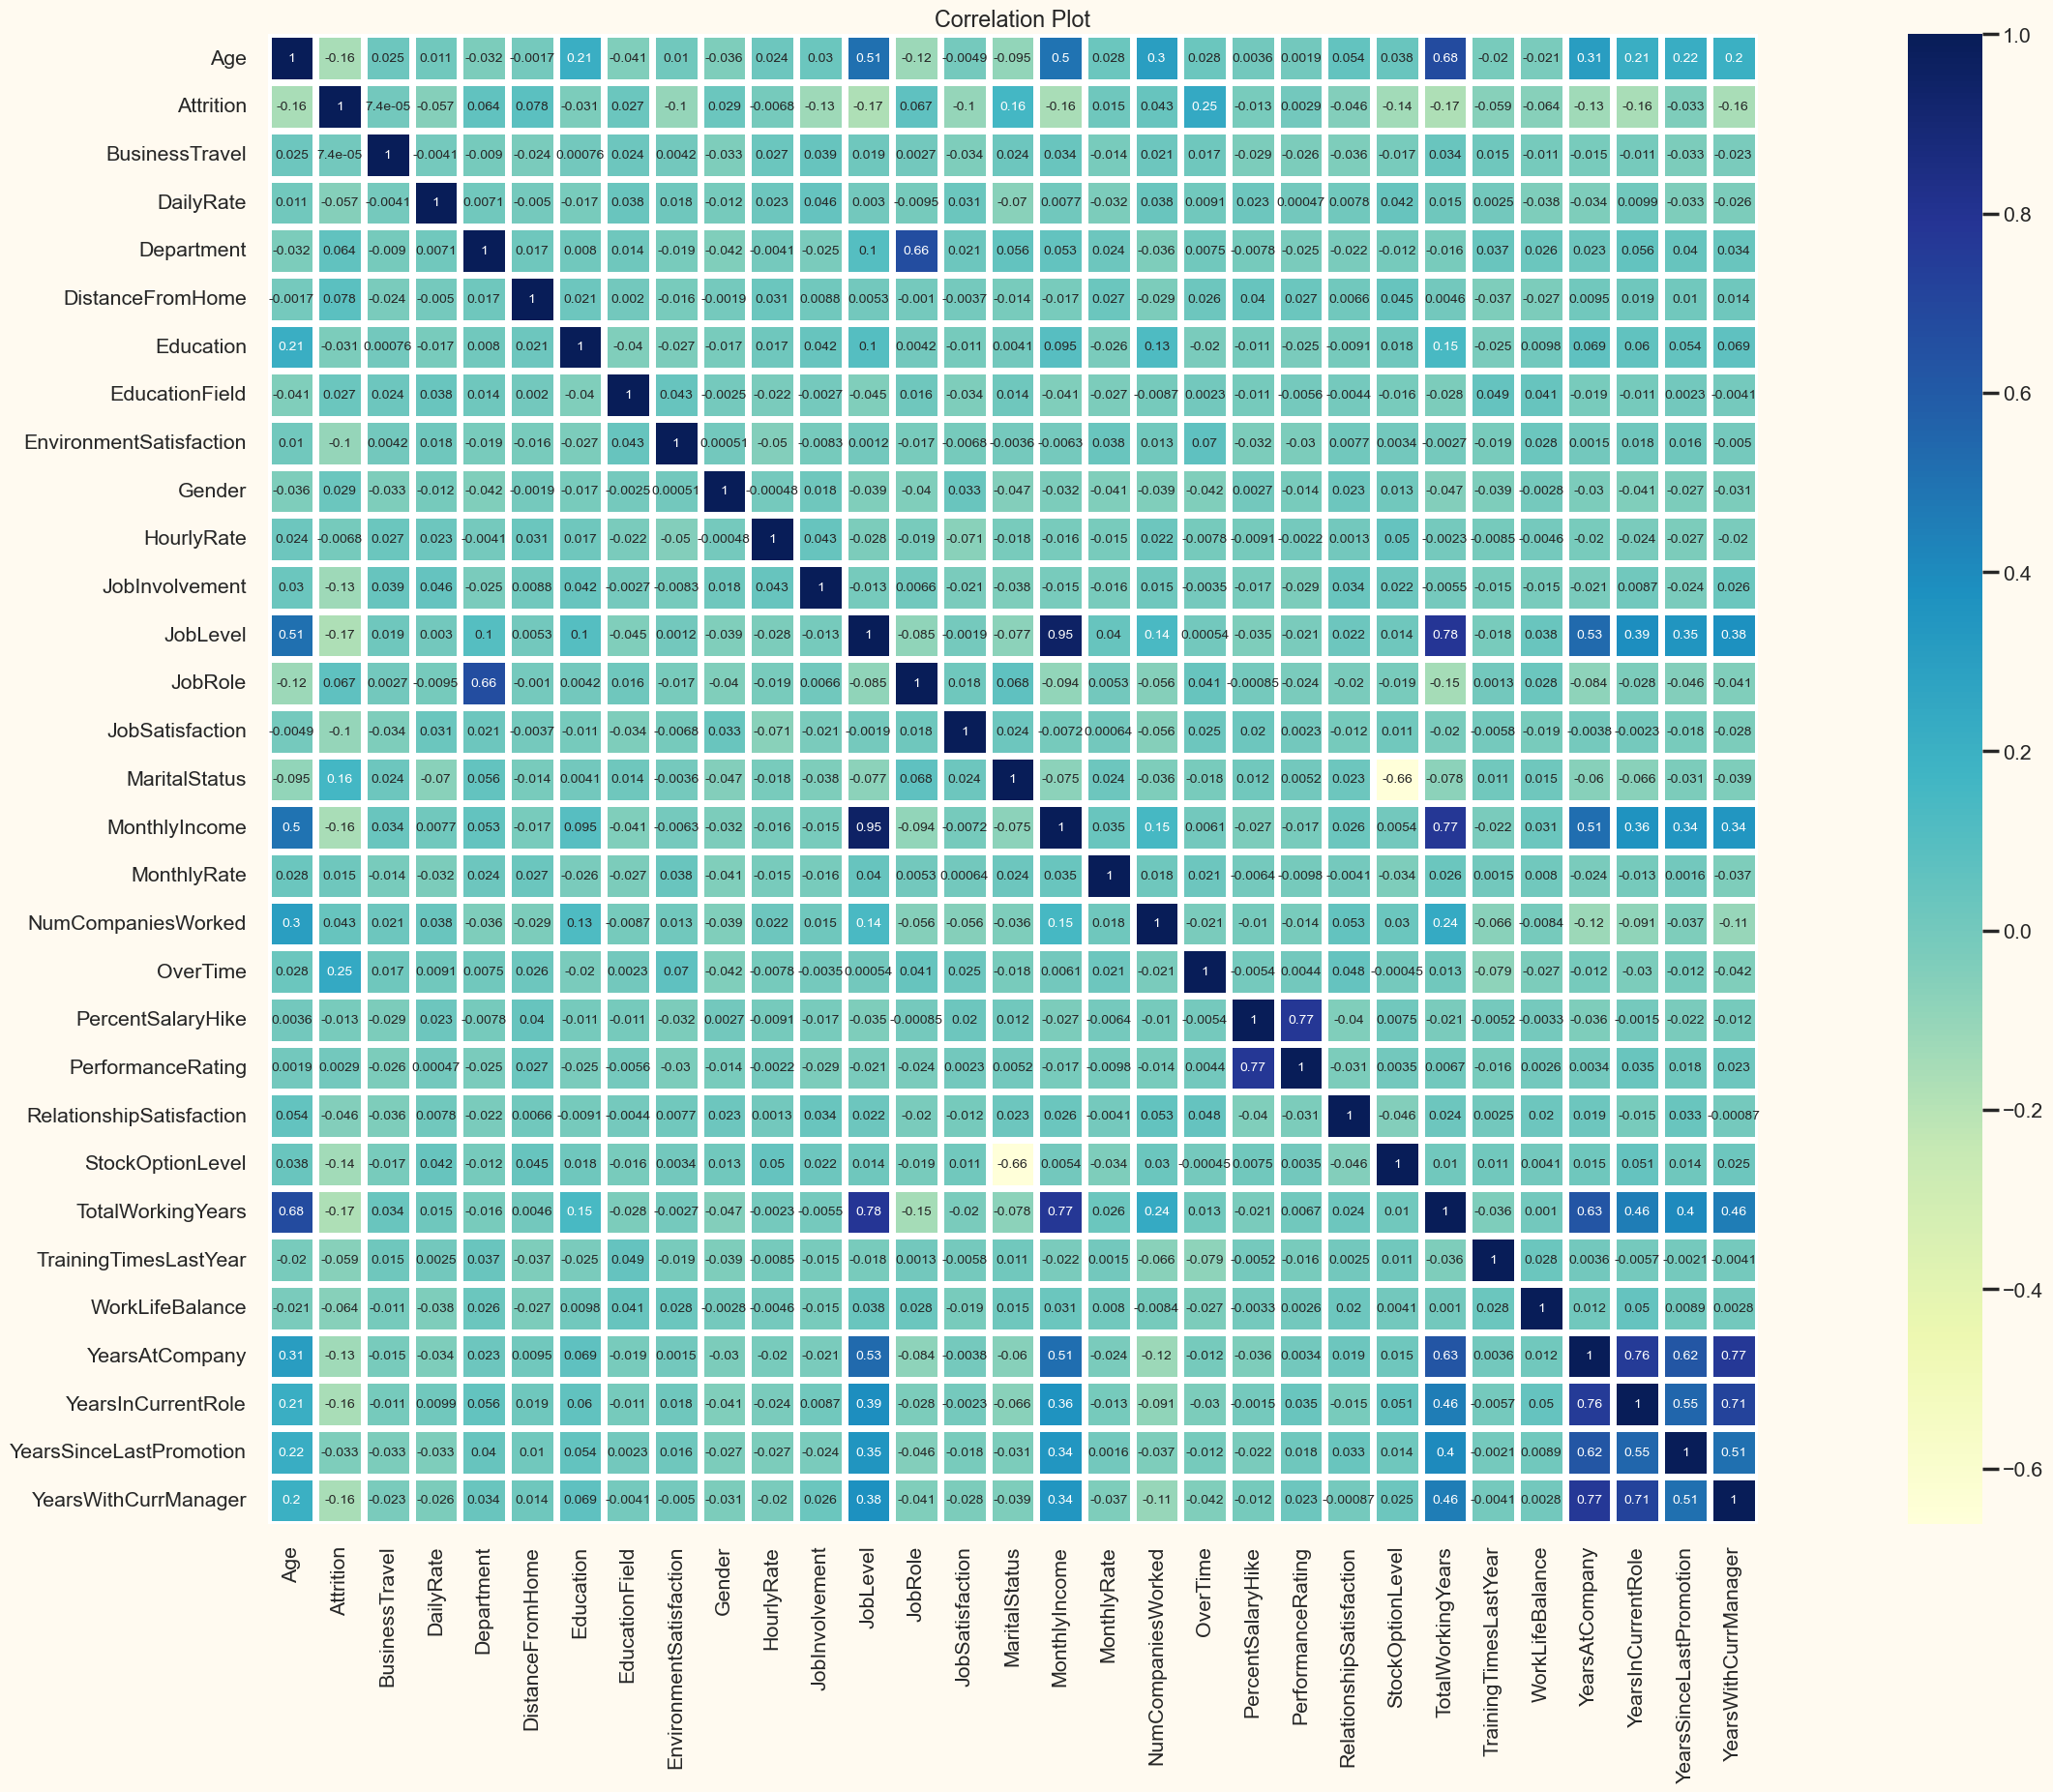

In [68]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [69]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

# Optionally, you can filter the correlation matrix to display only the highly correlated values
correlation_matrix.where(high_correlation_mask, inplace=True)

Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager


In [70]:
# droping columns which are highly correlated

cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
data.drop(columns=cols, inplace=True)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Check for Imbalance in Dataset </div>

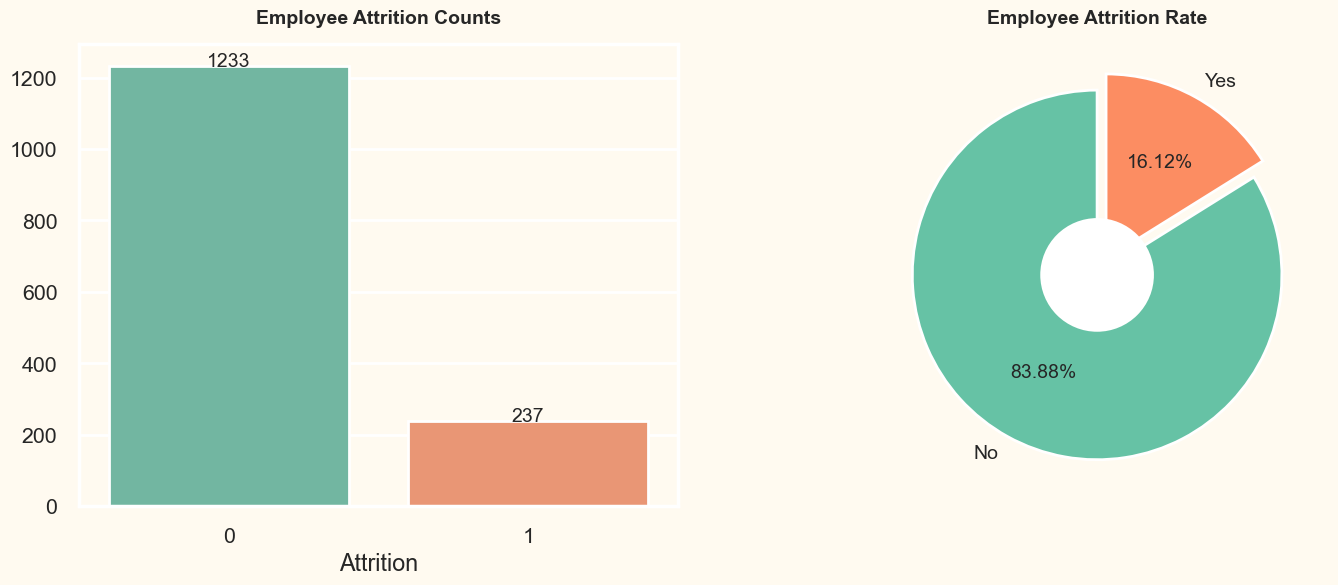

In [71]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Dataset is Imbalance.  
* Need to Balance the dataset 

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Independent and Dependent Variable </div>

In [72]:
x = data.drop(['Attrition'], axis=1)
y = data[['Attrition']]

In [73]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,2,1102,2,1,1,1,1,0,94,2,7,3,2,5993,19479,8,1,2,0,0,0,0,6,0
1,49,1,279,1,8,0,1,2,1,61,1,6,1,1,5130,24907,1,0,3,3,1,3,2,10,1
2,37,2,1373,1,2,1,4,3,1,92,1,2,2,2,2090,2396,6,1,2,1,0,3,2,0,0
3,33,1,1392,1,3,3,1,3,0,56,2,6,2,1,2909,23159,1,1,2,2,0,3,2,8,3
4,27,2,591,1,2,0,3,0,1,40,2,2,1,1,3468,16632,9,0,2,3,1,3,2,2,2


In [74]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Balance the Dataset using SMOTE </div>

In [75]:
%pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [76]:
import imblearn


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/monica/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print()
print(y_smote.value_counts())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Feature Scaling </div>

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x_smote)
data_scaled = scaler.fit_transform(data)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Training and Test (Unscaled) </div>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Training and Test (Scaled) </div>

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [ ]:
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Importing Necessary Libraries for Model Building </div>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn import metrics
from sklearn.metrics import *

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Building </div>

In [ ]:
training_score = []
testing_score = []
precission = []
recall = []
auc_score = []

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Building for Scaled Data </div>

In [ ]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    auc_score.append(e)
    
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Logistic Regression Model </div>

In [ ]:
model_prediction(LogisticRegression())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> K Nearest Neighbor (KNN) </div>

In [ ]:
model_prediction(KNeighborsClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Naive Bayes </div>

In [ ]:
model_prediction(GaussianNB())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Building for Unscaled Data </div>

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    auc_score.append(e)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Decision Tree </div>

In [ ]:
model_prediction(DecisionTreeClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Decision Tree hyperparameter tuning </div>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Random Forest </div>

In [ ]:
model_prediction(RandomForestClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Random Forest hyperparameter tuning a)Randomized Search Cross Validation</div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)
y_train_1d = y_train.values.ravel()

# Use the 1-dimensional array in the fit method
rf_cv.fit(x_train1, y_train_1d)

rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train1, y_train)

model_prediction(rf_clf)

 ## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Random Forest hyperparameter tuning b)Grid Search Cross Validation</div>

In [ ]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf, 
    params_grid, 
    scoring="f1", 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)


rf_cv.fit(x_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Creating a DataFrame for Storing Result </div>

In [ ]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost"]

In [ ]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                  "Precision": precission,
                  "Recall": recall,
                  "AUC Score": auc_score})
df

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Random forest, Gradient Boosting & XGBoost Model are having High Test Accuracy and AUC Score.